# Tunisian Real-Estate Price Predictor

### 1. Imports & Settings

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", font_scale=1.1)
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

### 2. Load the raw data

In [2]:
# Load the raw data
df = pd.read_csv('apartments.csv',sep=",")
df=df.drop("title",axis=1)
df=df.drop("link",axis=1)
df=df.drop("ad_id",axis=1)

# Correct typos in column names for consistency
df.rename(columns={
    'meubl': 'meuble',
    'rfrigrateur': 'refrigerateur',
    'scurit': 'securite',
    'faade_extrieure': 'facde_exterieure',
    'cuisine_quipe': 'cuisine_equipee'
    
}, inplace=True)

# Replace "Prix à consulter" with NaN (null)
df['price'].replace("Prix à consulter", np.nan, inplace=True)

print("First rows of the dataset:")
df.head()


First rows of the dataset:


,price,location,surface,total_pieces,bedrooms,bathrooms,antenne_parabolique,ascenseur,chambre_rangement,chauffage_central,...,meuble,microondes,piscine,porte_blinde,refrigerateur,salon_europen,securite,terrasse,vue_sur_les_montagnes,vue_sur_mer
0,330 810 TND,"El Kantaoui,\n\t\t\t\t\t\t\t\tHammam Sousse",72\n\t\t\t\t\t\tm²,1 Pièce,1 Chambre,1 Salle de bain,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
1,NaN,"Les Jardins de Carthage,\n\t\t\t\t\t\t\t\tLe Kram",243\n\t\t\t\t\t\tm²,5 Pièces,4 Chambres,3 Salles de bains,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
2,235 000 TND,"Cité el Ghazela,\n\t\t\t\t\t\t\t\tRaoued",69\n\t\t\t\t\t\tm²,2 Pièces,1 Chambre,1 Salle de bain,1,1,1,1,...,0,0,0,1,0,1,1,0,0,0
3,1 255 000 TND,Mahdia,252\n\t\t\t\t\t\tm²,7 Pièces,3 Chambres,3 Salles de bains,1,0,0,1,...,0,0,0,1,0,0,1,1,0,1
4,NaN,La Soukra,108\n\t\t\t\t\t\tm²,3 Pièces,2 Chambres,2 Salles de bains,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [3]:
print(f"\n Dimensions du dataset: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f" Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


 Dimensions du dataset: 5,047 lignes × 31 colonnes
 Taille mémoire: 3.20 MB


### 🏠 Dataset Description

This dataset contains **34 variables** describing apartment characteristics and features:

* **title** *(deleted)*  
* **price**  
* **location**  
* **surface**  
* **total_pieces**  
* **bedrooms**  
* **bathrooms**  
* **link** *(deleted)*  
* **ad_id** *(deleted)*  
* **antenne_parabolique**  
* **ascenseur**  
* **chambre_rangement**  
* **chauffage_central**  
* **chemine**  
* **climatisation**  
* **concierge**  
* **cuisine_equipee**  
* **double_vitrage**  
* **entreseul**  
* **facade_exterieure**  
* **four**  
* **garage**  
* **jardin**  
* **machine_laver**  
* **meuble**  
* **microondes**  
* **piscine**  
* **porte_blinde**  
* **refrigerateur**  
* **salon_europen**  
* **securite**  
* **terrasse**  
* **vue_sur_les_montagnes**  
* **vue_sur_mer**


In [4]:
# Step 1: Basic Information
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nColumns and Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

=== Dataset Overview ===
Shape: (5047, 31)

Columns and Data Types:
price                    object
location                 object
surface                  object
total_pieces             object
bedrooms                 object
bathrooms                object
antenne_parabolique       int64
ascenseur                 int64
chambre_rangement         int64
chauffage_central         int64
chemine                   int64
climatisation             int64
concierge                 int64
cuisine_equipee           int64
double_vitrage            int64
entreseul                 int64
facde_exterieure          int64
four                      int64
garage                    int64
jardin                    int64
machine__laver            int64
meuble                    int64
microondes                int64
piscine                   int64
porte_blinde              int64
refrigerateur             int64
salon_europen             int64
securite                  int64
terrasse                  int64
vue_

### 🏠 Dataset Overview

The dataset contains **5047 samples** and **31 variables**, divided into two categories:

#### **Categorical Data**
- `price` — contains missing values  
- `location` — no missing values  
- `surface` — contains missing values  
- `total_pieces` — contains missing values  
- `bedrooms` — contains missing values  
- `bathrooms` — contains missing values  

#### **Numerical/Binary Data**
- `antenne_parabolique` — no missing values  
- `ascenseur` — no missing values  
- `chambre_rangement` — no missing values  
- `chauffage_central` — no missing values  
- `chemine` — no missing values  
- `climatisation` — no missing values  
- `concierge` — no missing values  
- `cuisine_equipee` — no missing values  
- `double_vitrage` — no missing values  
- `entreseul` — no missing values  
- `facde_exterieure` — no missing values  
- `four` — no missing values  
- `garage` — no missing values  
- `jardin` — no missing values  
- `machine__laver` — no missing values  
- `meuble` — no missing values  
- `microondes` — no missing values  
- `piscine` — no missing values  
- `porte_blinde` — no missing values  
- `refrigerateur` — no missing values  
- `salon_europen` — no missing values  
- `securite` — no missing values  
- `terrasse` — no missing values  
- `vue_sur_les_montagnes` — no missing values  
- `vue_sur_mer` — no missing values


### Raw Data Dictionary – Variable Types, Descriptions & Modalities 

| Variable                  | Type                     | Description                                                                 | Modalities (if discrete)         |
|---------------------------|--------------------------|-----------------------------------------------------------------------------|----------------------------------|
| `title`                   | Qualitative (free text)  | Ad title (e.g., "S1 direct from developer...")                              | -                                |
| `price`                   | Text (to be cleaned)     | Displayed price (e.g., "330 810 TND", "Price on request")                   | -                                |
| `location`                | Qualitative (text)       | Full location (e.g., "El Kantaoui,\n\t\t\t\t\t\t\t\tHammam Sousse")         | -                                |
| `surface`                 | Text (to be cleaned)     | Living area in m² (e.g., "72\n\t\t\t\t\t\t\tm²")                            | -                                |
| `total_pieces`            | Qualitative (ordinal)    | Total number of rooms (e.g., "1 Room", "5 Rooms")                           | 1 to 10+ Rooms                   |
| `bedrooms`                | Qualitative (ordinal)    | Number of bedrooms (e.g., "1 Bedroom", "4 Bedrooms")                        | 0 to 5+ Bedrooms                  |
| `bathrooms`               | Qualitative (ordinal)    | Number of bathrooms (e.g., "1 Bathroom", "3 Bathrooms")                     | 1 to 5+ Bathrooms                 |
| `link`                    | Text (URL)               | Link to the ad on Mubawab                                                   | -                                |
| `ad_id`                   | Identifier               | Unique ad ID (not used in modeling)                                         | -                                |
| `antenne_parabolique`     | Binary (0/1)             | Satellite dish                                                              | 0 = No, 1 = Yes                  |
| `ascenseur`               | Binary (0/1)             | Elevator                                                                    | 0 = No, 1 = Yes                  |
| `chambre_rangement`       | Binary (0/1)             | Storage room / dressing room                                                | 0 = No, 1 = Yes                  |
| `chauffage_central`       | Binary (0/1)             | Central heating                                                             | 0 = No, 1 = Yes                  |
| `chemine`                 | Binary (0/1)             | Fireplace                                                                   | 0 = No, 1 = Yes                  |
| `climatisation`           | Binary (0/1)             | Air conditioning                                                            | 0 = No, 1 = Yes                  |
| `concierge`               | Binary (0/1)             | Concierge / security guard                                                  | 0 = No, 1 = Yes                  |
| `cuisine_quipe`           | Binary (0/1)             | Equipped kitchen                                                            | 0 = No, 1 = Yes                  |
| `double_vitrage`          | Binary (0/1)             | Double glazing                                                              | 0 = No, 1 = Yes                  |
| `entreseul`               | Binary (0/1)             | Private entrance                                                            | 0 = No, 1 = Yes                  |
| `faade_extrieure`         | Binary (0/1)             | Exterior facade                                                             | 0 = No, 1 = Yes                  |
| `four`                    | Binary (0/1)             | Oven                                                                        | 0 = No, 1 = Yes                  |
| `garage`                  | Binary (0/1)             | Garage / covered parking                                                    | 0 = No, 1 = Yes                  |
| `jardin`                  | Binary (0/1)             | Garden                                                                      | 0 = No, 1 = Yes                  |
| `machine__laver`          | Binary (0/1)             | Washing machine                                                             | 0 = No, 1 = Yes                  |
| `meuble`                  | Binary (0/1)             | Furnished                                                                   | 0 = No, 1 = Yes                  |
| `microondes`              | Binary (0/1)             | Microwave                                                                   | 0 = No, 1 = Yes                  |
| `piscine`                 | Binary (0/1)             | Swimming pool                                                               | 0 = No, 1 = Yes                  |
| `porte_blinde`            | Binary (0/1)             | Reinforced door                                                             | 0 = No, 1 = Yes                  |
| `refrigerateur`           | Binary (0/1)             | Refrigerator                                                                | 0 = No, 1 = Yes                  |
| `salon_europen`           | Binary (0/1)             | European-style living room                                                  | 0 = No, 1 = Yes                  |
| `securite`                | Binary (0/1)             | Security system                                                             | 0 = No, 1 = Yes                  |
| `terrasse`                | Binary (0/1)             | Terrace                                                                     | 0 = No, 1 = Yes                  |
| `vue_sur_les_montagnes`   | Binary (0/1)             | Mountain view                                                               | 0 = No, 1 = Yes                  |
| `vue_sur_mer`             | Binary (0/1)             | Sea view                                                                    | 0 = No, 1 = Yes                  |

### 3. Basic statistics

####  Basic statistics for numeric columns

In [5]:
print("\nBasic statistics for numeric columns:")
df.describe()


Basic statistics for numeric columns:


,antenne_parabolique,ascenseur,chambre_rangement,chauffage_central,chemine,climatisation,concierge,cuisine_equipee,double_vitrage,entreseul,...,meuble,microondes,piscine,porte_blinde,refrigerateur,salon_europen,securite,terrasse,vue_sur_les_montagnes,vue_sur_mer
count,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,...,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000
mean,0.238756,0.492570,0.118288,0.675054,0.013077,0.638795,0.406776,0.670894,0.361997,0.000396,...,0.098871,0.088964,0.114325,0.343372,0.088766,0.143055,0.529225,0.664157,0.035863,0.095304
std,0.426365,0.499994,0.322981,0.468401,0.113616,0.480397,0.491281,0.469935,0.480626,0.019905,...,0.298518,0.284720,0.318238,0.474882,0.284433,0.350164,0.499195,0.472331,0.185967,0.293664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Missing values

In [6]:
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


price                    971
location                   0
surface                  244
total_pieces             865
bedrooms                 548
bathrooms                692
antenne_parabolique        0
ascenseur                  0
chambre_rangement          0
chauffage_central          0
chemine                    0
climatisation              0
concierge                  0
cuisine_equipee            0
double_vitrage             0
entreseul                  0
facde_exterieure           0
four                       0
garage                     0
jardin                     0
machine__laver             0
meuble                     0
microondes                 0
piscine                    0
porte_blinde               0
refrigerateur              0
salon_europen              0
securite                   0
terrasse                   0
vue_sur_les_montagnes      0
vue_sur_mer                0
dtype: int64

#### Unique values for key categorical columns (top 10 each)

In [7]:
categorical_cols = ['total_pieces', 'bedrooms', 'bathrooms', 'location']
print("\nUnique values for key categorical columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))  # Top 10 to avoid too much output


Unique values for key categorical columns:

total_pieces:
total_pieces
3 Pièces     1506
4 Pièces      971
2 Pièces      841
1 Pièce       449
5 Pièces      241
6 Pièces       67
7 Pièces       39
10 Pièces      16
8 Pièces       15
12 Pièces       8
Name: count, dtype: int64

bedrooms:
bedrooms
2 Chambres     1829
3 Chambres     1408
1 Chambre       849
4 Chambres      286
5 Chambres       55
6 Chambres       13
10 Chambres      11
9 Chambres        9
7 Chambres        8
8 Chambres        7
Name: count, dtype: int64

bathrooms:
bathrooms
1 Salle de bain       2519
2 Salles de bains     1320
3 Salles de bains      409
4 Salles de bains       57
5 Salles de bains       22
6 Salles de bains        6
8 Salles de bains        6
10 Salles de bains       5
7 Salles de bains        3
11 Salles de bains       2
Name: count, dtype: int64

location:
location
Les Jardins de Carthage, Le Kram    387
La Soukra, La Soukra                314
Aouina, La Marsa                    214
Ain Zaghouan Nord,

####  Amenity Frequencies (binary features – 0/1 columns)

In [8]:
amenity_cols = [
    "antenne_parabolique", "ascenseur", "chambre_rangement", "chauffage_central",
    "chemine", "climatisation", "concierge", "cuisine_equipee", "double_vitrage",
    "entreseul",  "four", "garage", "jardin", "machine__laver",
    "meuble", "microondes", "piscine", "porte_blinde", "refrigerateur",
    "salon_europen", "securite", "terrasse", "vue_sur_les_montagnes", "vue_sur_mer"
]

print("\nAmenity Frequencies (% Yes):")
amenity_summary = (df[amenity_cols].sum() / len(df) * 100).round(1)
print(amenity_summary.sort_values(ascending=False))



Amenity Frequencies (% Yes):
chauffage_central        67.5
cuisine_equipee          67.1
terrasse                 66.4
climatisation            63.9
garage                   55.2
securite                 52.9
ascenseur                49.3
concierge                40.7
four                     36.5
double_vitrage           36.2
porte_blinde             34.3
antenne_parabolique      23.9
jardin                   22.1
salon_europen            14.3
chambre_rangement        11.8
piscine                  11.4
meuble                    9.9
vue_sur_mer               9.5
microondes                8.9
refrigerateur             8.9
machine__laver            6.4
vue_sur_les_montagnes     3.6
chemine                   1.3
entreseul                 0.0
dtype: float64


#### Quick Text Insights (e.g., price patterns)

In [9]:
print(f"\nUnique price patterns (top 10):")
print(df['price'].value_counts().head(10))

print(f"\nUnique surface patterns (top 10):")
print(df['surface'].value_counts().head(10))


Unique price patterns (top 10):
price
350 000 TND    92
250 000 TND    80
320 000 TND    69
450 000 TND    67
280 000 TND    65
240 000 TND    65
360 000 TND    61
420 000 TND    60
550 000 TND    54
220 000 TND    54
Name: count, dtype: int64

Unique surface patterns (top 10):
surface
100\n\t\t\t\t\t\tm²    179
120\n\t\t\t\t\t\tm²    154
110\n\t\t\t\t\t\tm²    110
90\n\t\t\t\t\t\tm²     107
150\n\t\t\t\t\t\tm²     96
130\n\t\t\t\t\t\tm²     96
80\n\t\t\t\t\t\tm²      93
70\n\t\t\t\t\t\tm²      83
160\n\t\t\t\t\t\tm²     74
60\n\t\t\t\t\t\tm²      72
Name: count, dtype: int64


#### Numeric summary

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("3. NUMERIC SUMMARY")
df[numeric_cols].describe(percentiles=[.25, .5, .75, .9, .95]).round(1)

3. NUMERIC SUMMARY


,antenne_parabolique,ascenseur,chambre_rangement,chauffage_central,chemine,climatisation,concierge,cuisine_equipee,double_vitrage,entreseul,...,meuble,microondes,piscine,porte_blinde,refrigerateur,salon_europen,securite,terrasse,vue_sur_les_montagnes,vue_sur_mer
count,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,...,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0,5047.0
mean,0.2,0.5,0.1,0.7,0.0,0.6,0.4,0.7,0.4,0.0,...,0.1,0.1,0.1,0.3,0.1,0.1,0.5,0.7,0.0,0.1
std,0.4,0.5,0.3,0.5,0.1,0.5,0.5,0.5,0.5,0.0,...,0.3,0.3,0.3,0.5,0.3,0.4,0.5,0.5,0.2,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
75%,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
90%,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
95%,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 4. Target Variable Analysis(Price)

#### Clean price → price_num (TND as float)

In [11]:
def clean_price(text):
    if pd.isna(text):
        return np.nan
    text = str(text).strip()
    if text in ["Prix à consulter", "À partir de", ""]:
        return np.nan
    # Remove all non-digit characters except spaces
    digits = re.sub(r"[^\d]", "", text)
    return float(digits) if digits else np.nan

# Apply cleaning
df["price_num"] = df["price"].apply(clean_price)

print("Price cleaning complete.")
print(f"   → Valid prices: {df['price_num'].notna().sum():,}")
print(f"   → Missing / 'Prix à consulter': {df['price_num'].isna().sum():,}")

Price cleaning complete.
   → Valid prices: 4,076
   → Missing / 'Prix à consulter': 971


####  Basic stats on price_num

In [12]:
print("2. PRICE STATISTICS (TND)")
# Display all floats without scientific notation
pd.set_option('display.float_format', '{:,.0f}'.format)
stats = df["price_num"].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).round(0)
print(stats)
print(f"\n   Min price : {stats['min']:,} TND")
print(f"   Max price : {stats['max']:,} TND")
print(f"   Median    : {stats['50%']:,} TND")
print(f"   95th %    : {stats['95%']:,} TND")
print(f"   99th %    : {stats['99%']:,} TND")

2. PRICE STATISTICS (TND)
count           4,076
mean        2,121,486
std        55,761,398
min             7,000
1%             95,000
5%            145,000
25%           250,000
50%           360,000
75%           533,041
95%         1,050,000
99%         1,900,000
max     3,324,000,000
Name: price_num, dtype: float64

   Min price : 7,000.0 TND
   Max price : 3,324,000,000.0 TND
   Median    : 360,000.0 TND
   95th %    : 1,050,000.0 TND
   99th %    : 1,900,000.0 TND



#### 3. Distribution (log scale)


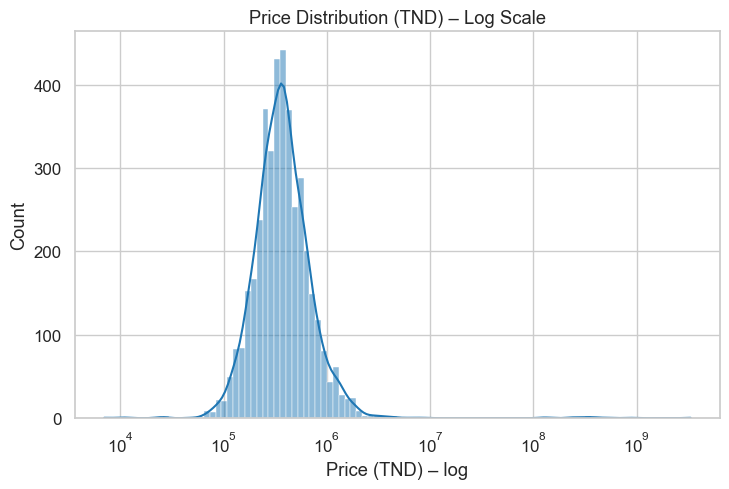

In [13]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
sns.histplot(df["price_num"].dropna(), bins=100, kde=True, color="#1f77b4", log_scale=(True, False))
plt.title("Price Distribution (TND) – Log Scale")
plt.xlabel("Price (TND) – log")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### Price distributions (histogram)


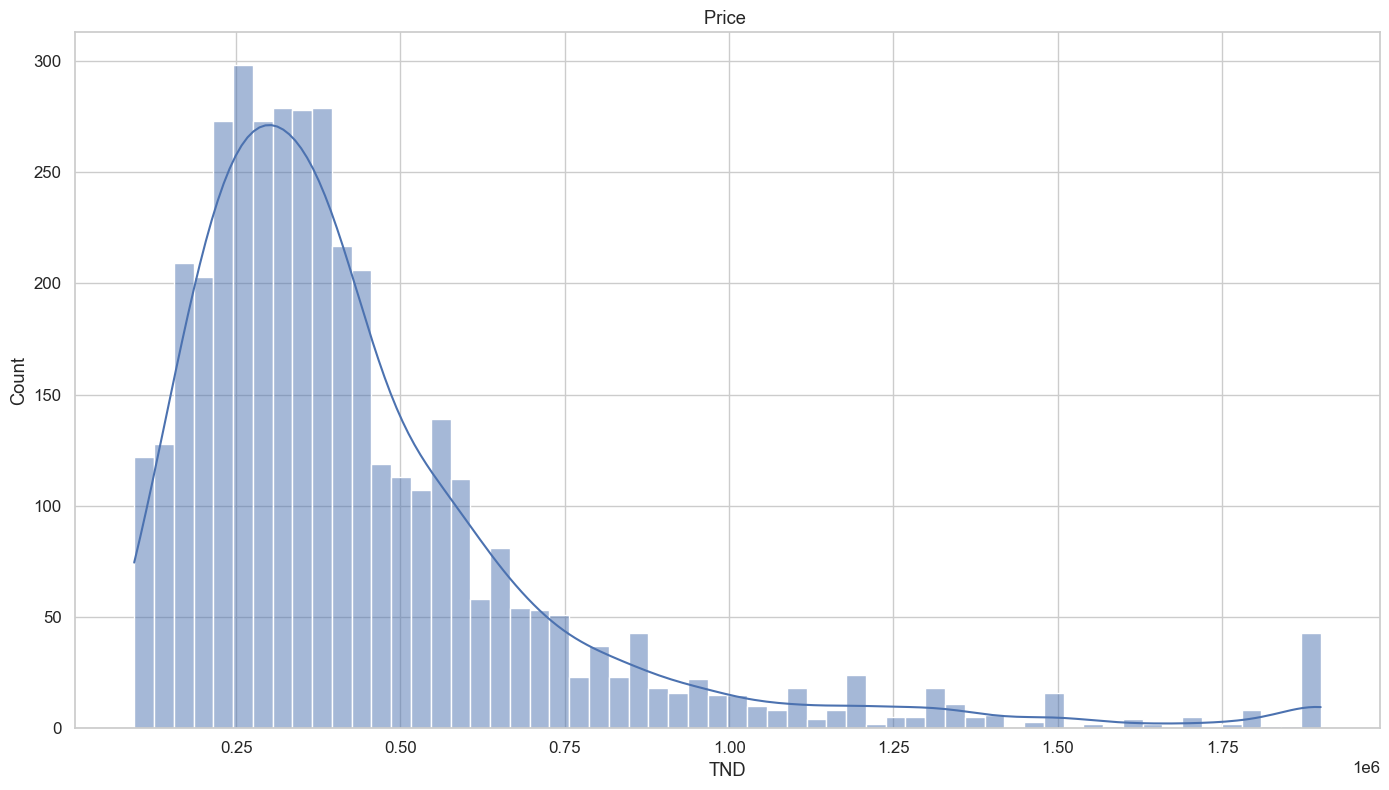

In [14]:
p1, p99 = df['price_num'].quantile([0.01, 0.99])
sns.histplot(df['price_num'].clip(lower=p1, upper=p99), bins=60, kde=True)
plt.title("Price ")
plt.xlabel("TND")
plt.tight_layout()
plt.show()

#### Median Property Price by City (Top 12 Cities)

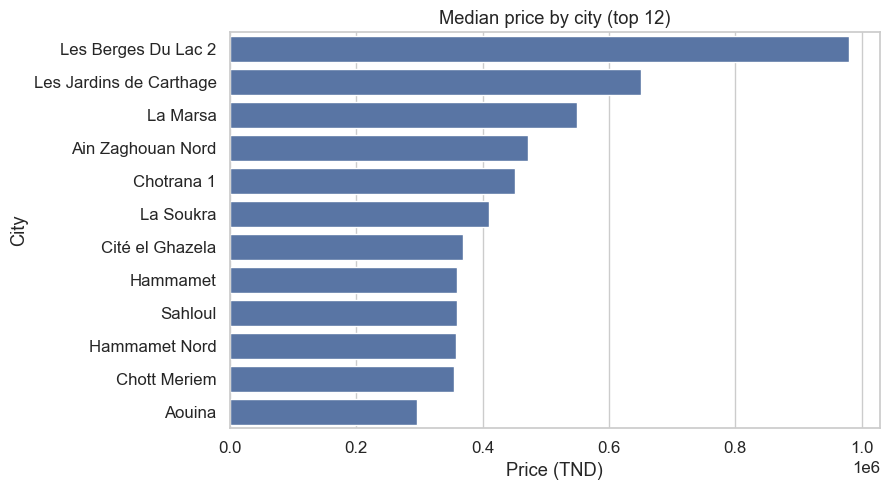

In [15]:
if 'location' in df.columns:
    def city_from_location(s):
        if pd.isna(s): return np.nan
        return str(s).split(',')[0].strip()
    df['city'] = df['location'].apply(city_from_location)
if {'city','price_num'}.issubset(df.columns):
    top12 = df['city'].value_counts().head(12).index
    city_price = (df[df['city'].isin(top12)]
                  .groupby('city')['price_num'].median()
                  .sort_values(ascending=False))
    plt.figure(figsize=(9,5))
    sns.barplot(x=city_price.values, y=city_price.index, orient='h')
    plt.title("Median price by city (top 12)")
    plt.xlabel("Price (TND)")
    plt.ylabel("City")
    plt.tight_layout()
    plt.show()



#### Top 10 most expensive & cheapest listings


In [16]:
print("\n" + "="*60)
print("4. TOP 10 MOST EXPENSIVE APARTMENTS")
print("="*60)
top_exp = df.nlargest(10, "price_num")[["price", "location", "surface", "price_num"]]
top_exp.index = range(1, len(top_exp) + 1)
top_exp




4. TOP 10 MOST EXPENSIVE APARTMENTS


,price,location,surface,price_num
1,3 324 000 000 TND,"Centre Ville, Gafsa Sud",370\n\t\t\t\t\t\tm²,"3,324,000,000"
2,850 000 000 TND,"Les Jardins de Carthage, Le Kram",160\n\t\t\t\t\t\tm²,"850,000,000"
3,520 000 000 TND,"Dar Fadhal, La Soukra",200\n\t\t\t\t\t\tm²,"520,000,000"
4,400 000 000 TND,"Sousse Ville, Sousse Ville",90\n\t\t\t\t\t\tm²,"400,000,000"
5,360 000 000 TND,"El Fejja, Mornaguia",160\n\t\t\t\t\t\tm²,"360,000,000"
6,350 000 000 TND,"Sidi Daoued, La Marsa",150\n\t\t\t\t\t\tm²,"350,000,000"
7,291 035 008 TND,"El Aouina, El Aouina",119\n\t\t\t\t\t\tm²,"291,035,008"
8,250 000 000 TND,"Ain Zaghouan Nord, La Marsa",105\n\t\t\t\t\t\tm²,"250,000,000"
9,230 000 000 TND,"Bab Bhar, Tunis",114\n\t\t\t\t\t\tm²,"230,000,000"
10,135 000 000 TND,"Cité Mohamed Ali, Rades",70\n\t\t\t\t\t\tm²,"135,000,000"


In [17]:
print("\n" + "="*60)
print("5. TOP 10 CHEAPEST APARTMENTS (with valid price)")
print("="*60)
top_cheap = df[df["price_num"] > 0].nsmallest(10, "price_num")[["price", "location", "surface", "price_num"]]
top_cheap.index = range(1, len(top_cheap) + 1)
top_cheap


5. TOP 10 CHEAPEST APARTMENTS (with valid price)


,price,location,surface,price_num
1,7 000 TND,"Les Jardins de Carthage, Le Kram",NaN,"7,000"
2,10 000 TND,"La Soukra, La Soukra",480\n\t\t\t\t\t\tm²,"10,000"
3,11 210 TND,"Ain Zaghouan Nord, La Marsa",55\n\t\t\t\t\t\tm²,"11,210"
4,24 000 TND,"Cité Ennkhilet, Raoued",95\n\t\t\t\t\t\tm²,"24,000"
5,26 000 TND,"Mansourah, Al-Qayrawan",160\n\t\t\t\t\t\tm²,"26,000"
6,26 000 TND,"Hammamet Nord, Hammamet",103\n\t\t\t\t\t\tm²,"26,000"
7,50 000 TND,"Lebna, Menzel Temime",100\n\t\t\t\t\t\tm²,"50,000"
8,65 000 TND,"Thyna, Thyna",67\n\t\t\t\t\t\tm²,"65,000"
9,69 000 TND,"Sousse Riadh, Sousse Riadh",73\n\t\t\t\t\t\tm²,"69,000"
10,69 000 TND,"Ksar Said, Le Bardo",58\n\t\t\t\t\t\tm²,"69,000"


#### Engineer price_per_m2 (requires surface_num)

In [18]:
def clean_surface(text):
    if pd.isna(text):
        return np.nan
    m = re.search(r"(\d+)", str(text))
    return float(m.group(1)) if m else np.nan

df["surface_num"] = df["surface"].apply(clean_surface)
df["price_per_m2"] = df["price_num"] / df["surface_num"]

print(f"\n   → price_per_m2 computed for {df['price_per_m2'].notna().sum():,} listings")


   → price_per_m2 computed for 3,918 listings


#### Price per m² analysis

In [19]:
print("\n" + "="*60)
print("6. PRICE PER M² STATISTICS")
print("="*60)
ppm_stats = df["price_per_m2"].describe(percentiles=[.25, .5, .75, .9, .95, .99]).round(0)
ppm_stats


6. PRICE PER M² STATISTICS


count       3,918
mean       12,323
std       205,160
min             2
25%         2,432
50%         3,268
75%         4,113
90%         5,371
95%         5,958
99%         8,500
max     8,983,784
Name: price_per_m2, dtype: float64

## 6. FEATURE ENGINEERING - NEW VARIABLES

#### Clean Core Numeric Features

In [20]:
def to_int_safe(x):
    try:
        return int(x)
    except:
        return np.nan

def parse_price(val):
    if pd.isna(val):
        return np.nan
    s = str(val)
    if "Prix" in s or "À partir" in s:
        return np.nan
    s = s.replace("TND", "").replace("\u00a0", " ")
    s = re.sub(r"[^0-9]", "", s)
    return pd.to_numeric(s, errors="coerce")

def parse_surface(val):
    if pd.isna(val):
        return np.nan
    s = str(val).replace("\n", " ").replace("\t", " ").replace("\u00a0", " ")
    s = re.sub(r"[^0-9.]", "", s)
    return pd.to_numeric(s, errors="coerce")

def parse_number_from_text(val):
    if pd.isna(val):
        return np.nan
    m = re.search(r"(\d+)", str(val))
    return float(m.group(1)) if m else np.nan

#### CREATE df_eng FROM df (raw)

In [21]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

# Work on a copy so original df stays clean
df_eng = df.copy()

print(f"Starting with {df_eng.shape[0]} rows")

Starting with 5047 rows


####  PARSE CORE NUMERIC COLUMNS

In [22]:
if 'price' in df_eng.columns:
    df_eng['price_num'] = df_eng['price'].apply(parse_price)

if 'surface' in df_eng.columns:
    df_eng['surface_m2'] = df_eng['surface'].apply(parse_surface)

# Price per m²
df_eng['price_per_m2'] = df_eng['price_num'] / df_eng['surface_m2']

# Total rooms
if 'total_pieces' in df_eng.columns:
    df_eng['n_pieces'] = df_eng['total_pieces'].apply(parse_number_from_text)

# Bedrooms / Bathrooms
for c in ['bedrooms', 'bathrooms']:
    if c in df_eng.columns:
        df_eng[f'{c}_num'] = df[c].apply(parse_number_from_text)

#### CONVERT BINARY COLUMNS TO Int64 (nullable)

In [23]:
bool_candidates = []
for c in df_eng.columns:
    if c not in ['price_num','surface_m2','n_pieces','bedrooms_num','bathrooms_num',
                 'price_per_m2']:
        unique_vals = df_eng[c].dropna().astype(str).unique()
        if set(unique_vals).issubset({'0', '1'}):
            bool_candidates.append(c)

print(f"Found {len(bool_candidates)} binary (0/1) columns → converting to Int64")

for c in bool_candidates:
    df_eng[c] = pd.to_numeric(df_eng[c], errors='coerce').astype('Int64')

Found 25 binary (0/1) columns → converting to Int64


#### Location Engineering

In [24]:
# --- Extract quartier (last part after comma) ---
df_eng["quartier"] = df_eng["location"].astype(str).apply(
    lambda x: x.strip().split(",")[-1].strip().lower()
)

# --- Extract ville (second-to-last, if exists) ---
def extract_ville(loc):
    parts = [p.strip() for p in str(loc).split(",")]
    return parts[-2].lower() if len(parts) >= 2 else np.nan

df_eng["ville"] = df_eng["location"].apply(extract_ville)

# --- Is Coastal? (simple keyword) ---
coastal_keywords = ["mer", "plage", "kantaoui", "hammam", "sousse", "mahdia", "hammamet"]
df_eng["is_coastal"] = df_eng["quartier"].str.contains("|".join(coastal_keywords), case=False, na=False).astype(int)

# --- Is Luxury Area? (top 10% price/m²) ---
top_luxury = df_eng.groupby("quartier")["price_per_m2"].median().quantile(0.9)
df_eng["is_luxury_area"] = (df_eng["price_per_m2"] >= top_luxury).astype(int)

#### Size & Room Features

In [25]:
# --- Extract numbers from text ---
def extract_num(text, pattern=r"(\d+)"):
    if pd.isna(text): return np.nan
    m = re.search(pattern, str(text))
    return int(m.group(1)) if m else np.nan

df_eng["total_pieces_num"] = df_eng["total_pieces"].apply(extract_num)
df_eng["bedrooms_num"]     = df_eng["bedrooms"].apply(extract_num)
df_eng["bathrooms_num"]    = df_eng["bathrooms"].apply(extract_num)

# --- Rooms per m² ---
df_eng["pieces_per_m2"] = df_eng["total_pieces_num"] / df_eng["surface_num"]
df_eng["bedrooms_per_m2"] = df_eng["bedrooms_num"] / df_eng["surface_num"]

# --- Is Studio (S+1)? ---
df_eng["is_studio"] = ((df_eng["total_pieces_num"] == 1) | 
                       (df_eng["bedrooms_num"] == 1) & (df_eng["surface_num"] <= 50)).astype(int)

# --- Has Extra Rooms (dressing, storage, etc.) ---
extra_room_cols = ["chambre_rangement", "entreseul"]
df_eng["has_extra_room"] = df_eng[extra_room_cols].sum(axis=1) > 0

#### Luxury & Amenity Scores

In [26]:
# --- List of luxury amenities ---
luxury_amenities = [
    "piscine", "terrasse", "jardin", "vue_sur_mer", "vue_sur_les_montagnes",
    "ascenseur",  "concierge", "climatisation", "chauffage_central",
    "double_vitrage", "porte_blinde", "garage", "chemine"
]

# --- Luxury Score (0 to 14) ---
df_eng["luxury_score"] = df_eng[luxury_amenities].sum(axis=1)

# --- High-End Flag ---
df_eng["is_high_end"] = (df_eng["luxury_score"] >= 8).astype(int)

#### Price Binning & Ratios

In [27]:
# --- Price Tier (Cheap, Mid, Expensive, Luxury) ---
df_eng["price_tier"] = pd.qcut(
    df_eng["price_num"], 
    q=[0, 0.25, 0.75, 0.95, 1.0], 
    labels=["Cheap", "Mid-Range", "Expensive", "Luxury"]
)

# --- Price-to-Surface Ratio (already have price_per_m2) ---
# Optional: log transform
df_eng["log_price"] = np.log1p(df_eng["price_num"])
df_eng["log_price_per_m2"] = np.log1p(df_eng["price_per_m2"])

#### Final Clean & Target

In [28]:
# Drop rows with no price or surface
df_eng = df_eng.dropna(subset=["price_num", "surface_num", "price_per_m2"])

print(f"Final engineered dataset: {df_eng.shape[0]} rows, {df_eng.shape[1]} columns")

Final engineered dataset: 3918 rows, 53 columns


## VISUALIZATION OF NEW VARIABLES

#### CREATE TEMPORARY CLEAN COPY FOR PLOTTING

In [29]:
df_plot = df_eng.copy()

print(f"Original df_eng: {df_eng.shape[0]:,} rows")
print(f"Creating temporary clean copy for visualization...")

# Ensure core columns exist
required = ["price_num", "surface_m2", "price_per_m2"]
if not all(col in df_plot.columns for col in required):
    raise ValueError("Missing required columns. Run feature engineering first.")

# Drop rows with missing price/surface
df_plot = df_plot.dropna(subset=required)

# ------------------------------------------------------------------
# 2. TEMPORARILY REMOVE OUTLIERS USING IQR (ONLY FOR PLOTS)
# ------------------------------------------------------------------
def remove_outliers_iqr(temp_df, col):
    Q1 = temp_df[col].quantile(0.25)
    Q3 = temp_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return temp_df[(temp_df[col] >= lower) & (temp_df[col] <= upper)]

before = len(df_plot)
df_plot = remove_outliers_iqr(df_plot, "price_num")
df_plot = remove_outliers_iqr(df_plot, "surface_m2")
after = len(df_plot)

print(f"   → Temporarily removed {before - after:,} outliers for visualization")
print(f"   → Using {after:,} clean rows for plots")

# Recompute price_per_m2
df_plot["price_per_m2"] = df_plot["price_num"] / df_plot["surface_m2"]

Original df_eng: 3,918 rows
Creating temporary clean copy for visualization...
   → Temporarily removed 353 outliers for visualization
   → Using 3,565 clean rows for plots


#### Top 15 Quartiers – Prix Médian au m²

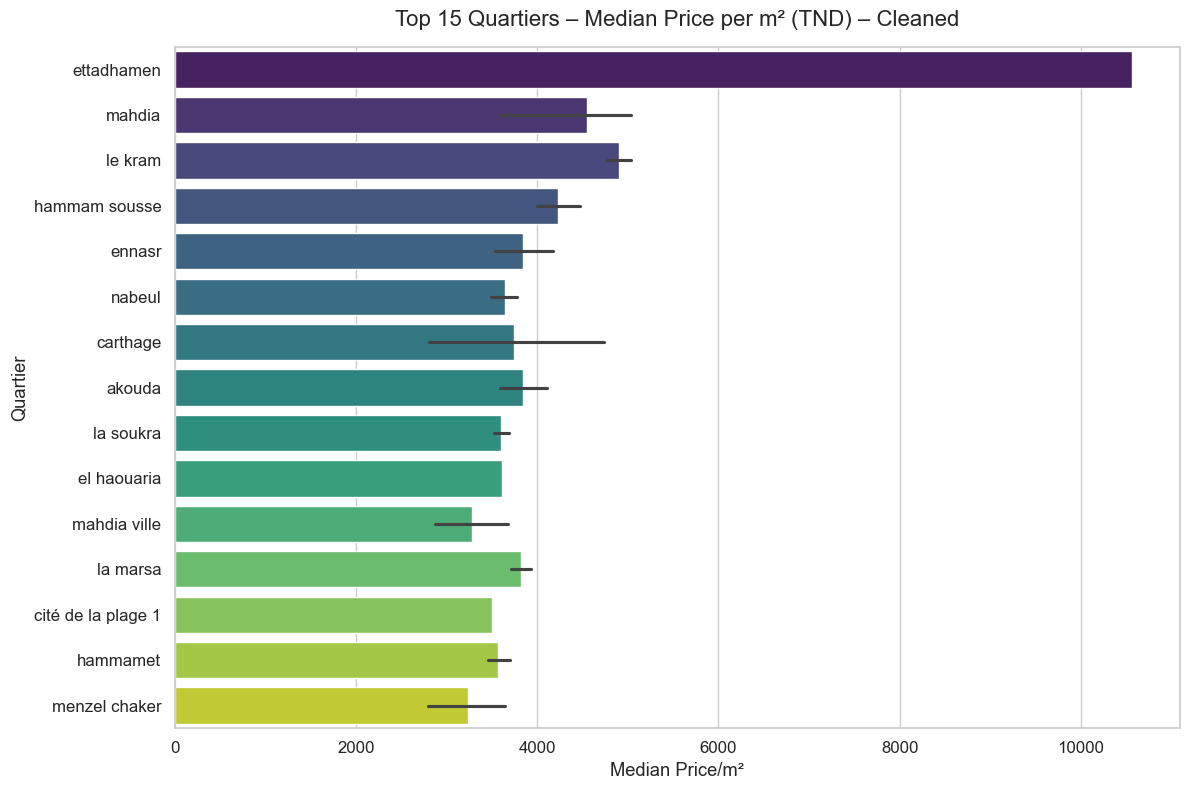

In [30]:
top_15 = (
    df_plot.groupby("quartier")["price_per_m2"]
    .median()
    .sort_values(ascending=False)
    .head(15)
    .index
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_plot[df_plot["quartier"].isin(top_15)],
    y="quartier", x="price_per_m2",
    order=top_15, palette="viridis"
)
plt.title("Top 15 Quartiers – Median Price per m² (TND) – Cleaned", fontsize=16, pad=15)
plt.xlabel("Median Price/m²"); plt.ylabel("Quartier")
plt.tight_layout(); plt.show()

#### Luxury Score vs Price/m² (Bubble = Count)

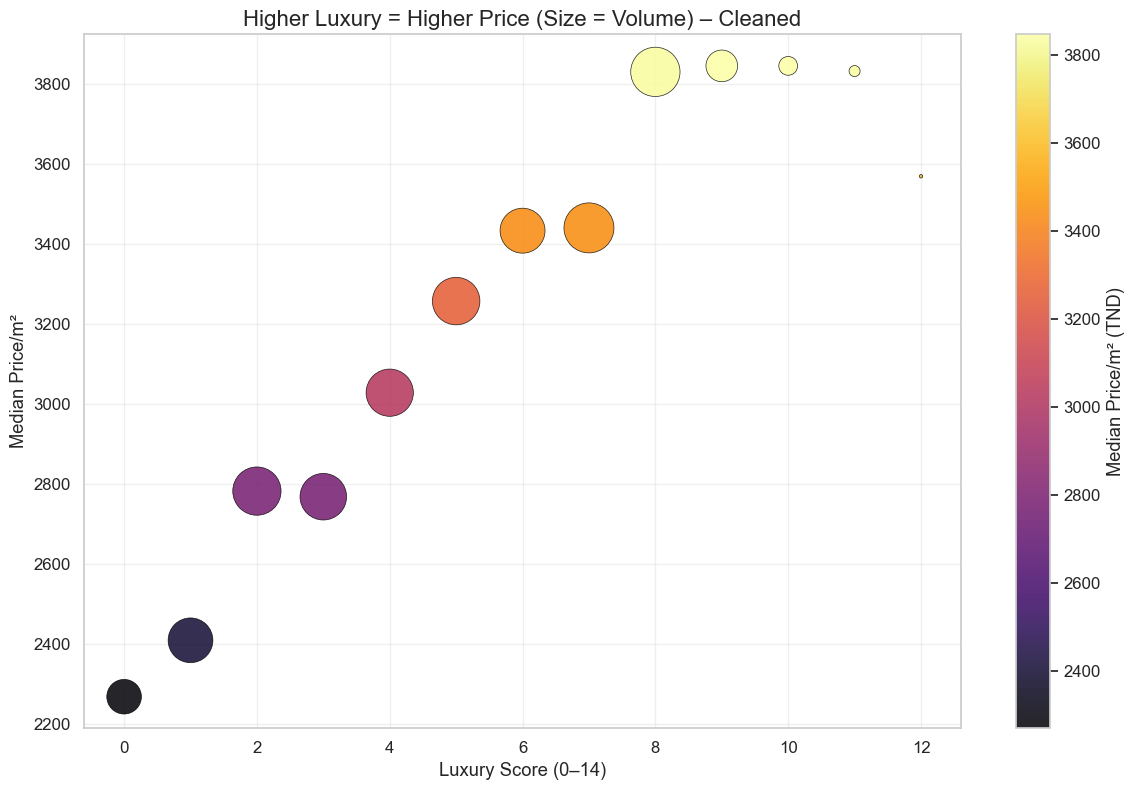

In [31]:
bubble = (
    df_plot.groupby("luxury_score")
    .agg({"price_per_m2": "median", "price_num": "count"})
    .round(0)
)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    bubble.index, bubble["price_per_m2"],
    s=bubble["price_num"] * 3, c=bubble["price_per_m2"],
    cmap="inferno", alpha=0.85, edgecolors="black", linewidth=0.5
)
plt.colorbar(scatter, label="Median Price/m² (TND)")
plt.xlabel("Luxury Score (0–14)"); plt.ylabel("Median Price/m²")
plt.title("Higher Luxury = Higher Price (Size = Volume) – Cleaned", fontsize=16)
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

#### Price Tier Distribution

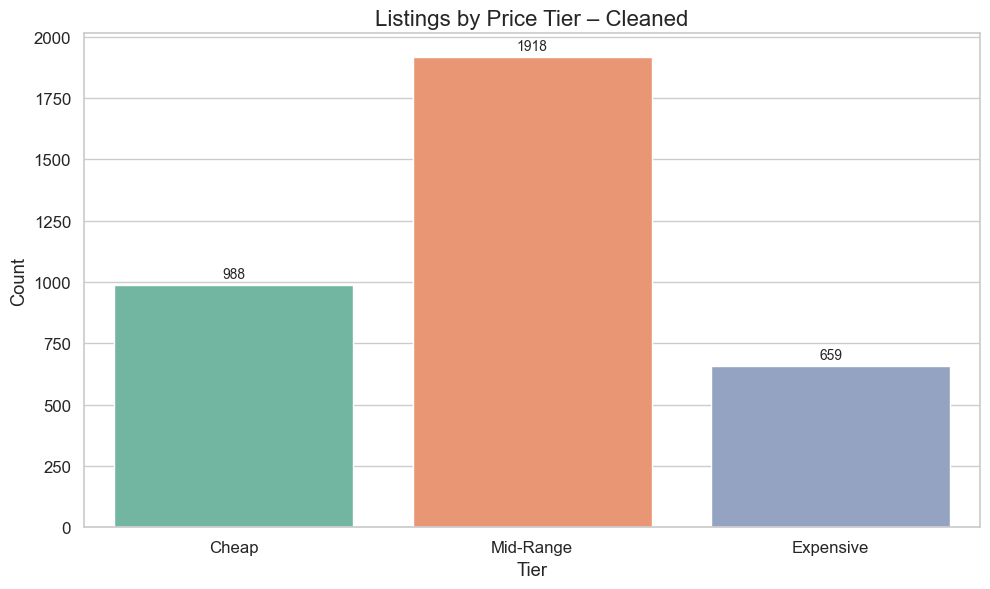

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_plot, x="price_tier", palette="Set2", order=["Cheap", "Mid-Range", "Expensive"])
plt.title("Listings by Price Tier – Cleaned", fontsize=16)
plt.xlabel("Tier"); plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.tight_layout(); plt.show()

#### Coastal vs Inland – Price/m²

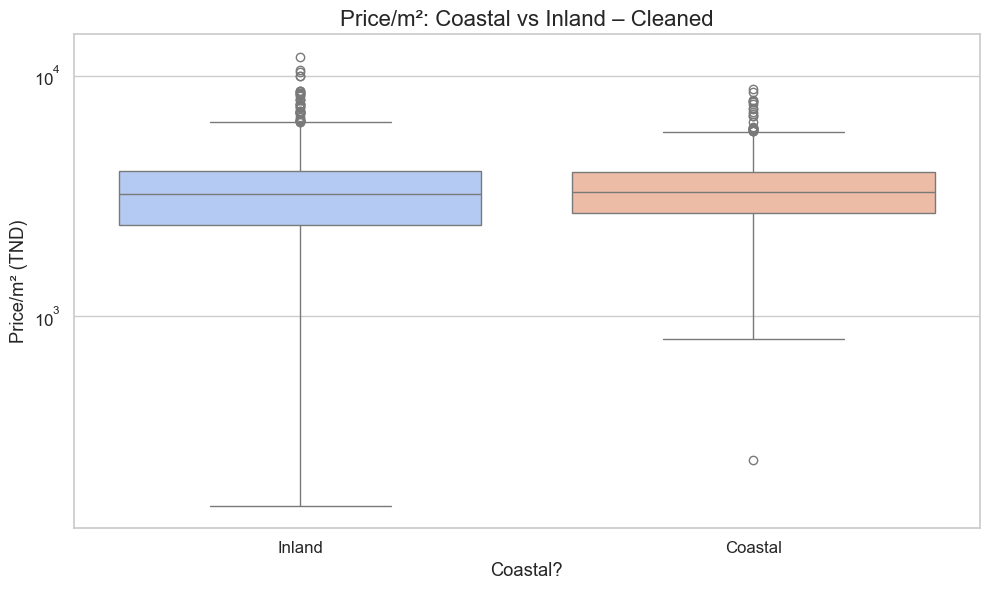

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x="is_coastal", y="price_per_m2", palette="coolwarm")
plt.title("Price/m²: Coastal vs Inland – Cleaned", fontsize=16)
plt.xlabel("Coastal?"); plt.ylabel("Price/m² (TND)")
plt.xticks([0, 1], ["Inland", "Coastal"]); plt.yscale("log")
plt.tight_layout(); plt.show()

#### Studio vs Non-Studio – Price & Surface

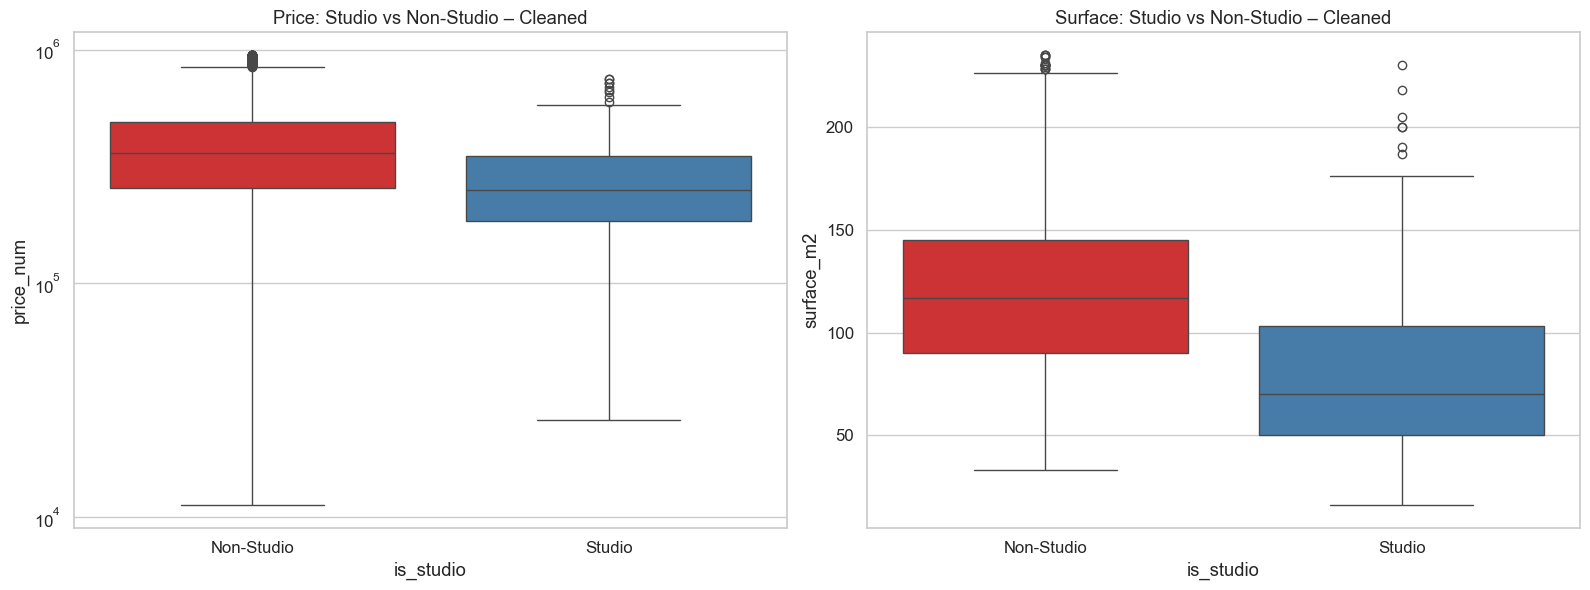

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=df_plot, x="is_studio", y="price_num", ax=ax1, palette="Set1"); ax1.set_yscale("log")
ax1.set_title("Price: Studio vs Non-Studio – Cleaned"); ax1.set_xticklabels(["Non-Studio", "Studio"])
sns.boxplot(data=df_plot, x="is_studio", y="surface_m2", ax=ax2, palette="Set1")
ax2.set_title("Surface: Studio vs Non-Studio – Cleaned"); ax2.set_xticklabels(["Non-Studio", "Studio"])
plt.tight_layout(); plt.show()

#### Top 10 Luxury Amenities (% of Listings)

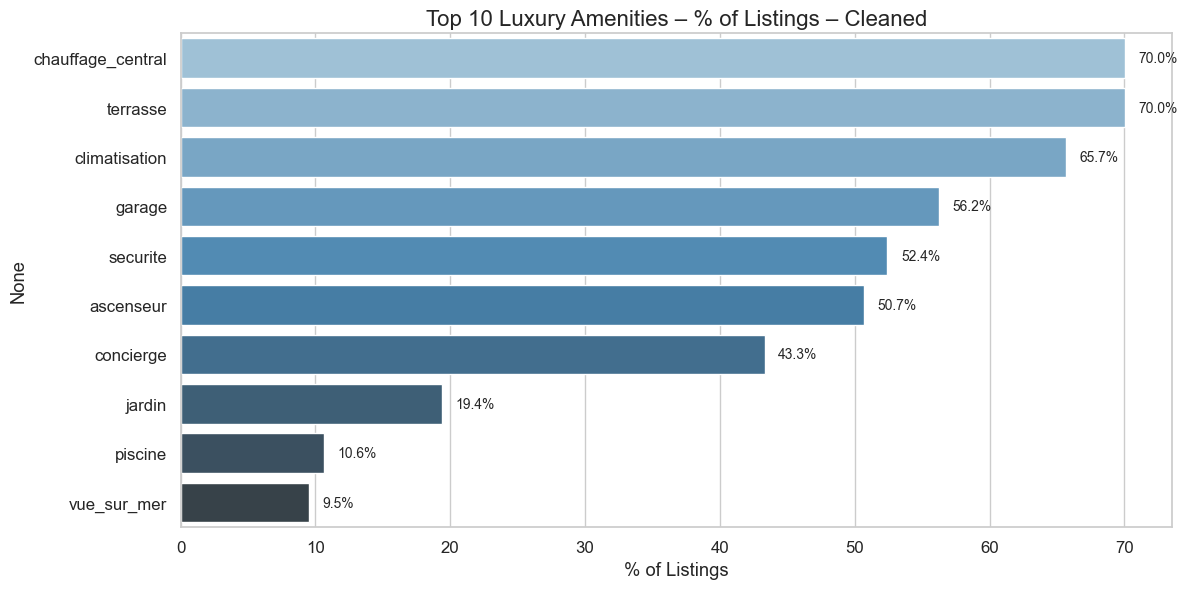

In [35]:
luxury_cols = ["piscine", "terrasse", "ascenseur", "climatisation", "securite",
               "jardin", "vue_sur_mer", "garage", "concierge", "chauffage_central"]
freq = (df_plot[luxury_cols].mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=freq.values, y=freq.index, palette="Blues_d")
plt.title("Top 10 Luxury Amenities – % of Listings – Cleaned", fontsize=16)
plt.xlabel("% of Listings")
for i, v in enumerate(freq.values):
    plt.text(v + 1, i, f"{v:.1f}%", va="center")
plt.tight_layout(); plt.show()

## ANALYSIS OF THE PRICE VARIABLE

#### Price Distribution (Log Scale)

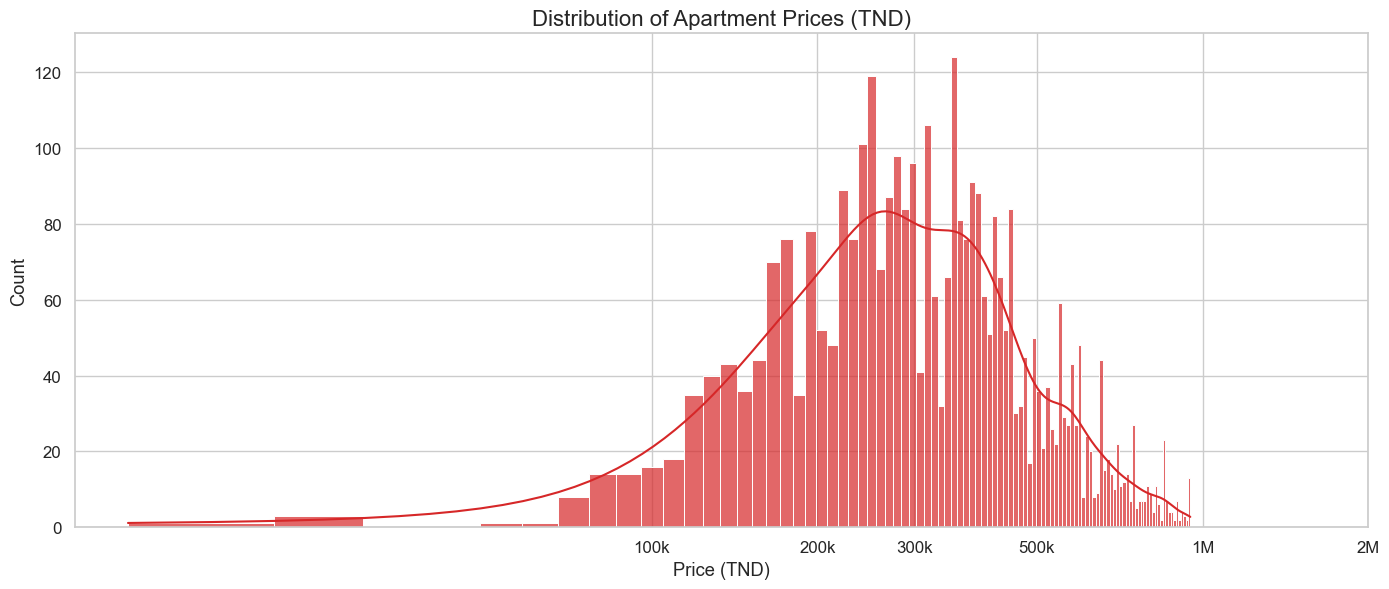

In [36]:
plt.figure(figsize=(14, 6))
sns.histplot(df_plot["price_num"], bins=100, kde=True, color="#d62728", alpha=0.7)
plt.title("Distribution of Apartment Prices (TND)", fontsize=16)
plt.xlabel("Price (TND)"); plt.ylabel("Count")
plt.xscale("log")
plt.xticks([1e5, 2e5, 3e5, 5e5, 1e6, 2e6], ["100k", "200k", "300k", "500k", "1M", "2M"])
plt.tight_layout(); plt.show()

#### Price by Price Tier (Boxplot)

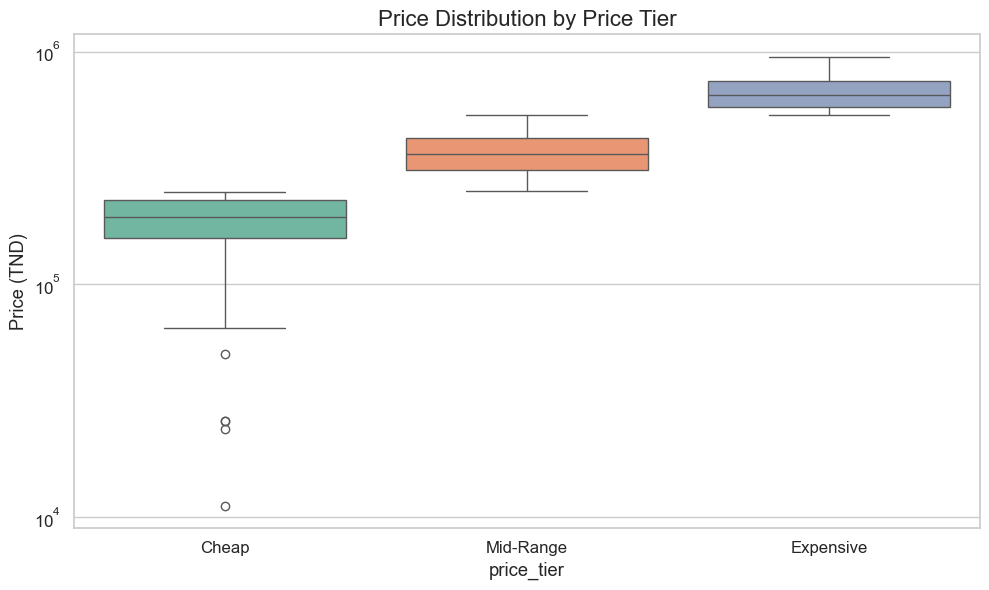

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x="price_tier", y="price_num",
            order=["Cheap", "Mid-Range", "Expensive"], palette="Set2")
plt.title("Price Distribution by Price Tier", fontsize=16)
plt.ylabel("Price (TND)"); plt.yscale("log")
plt.tight_layout(); plt.show()

#### Price vs Luxury Score

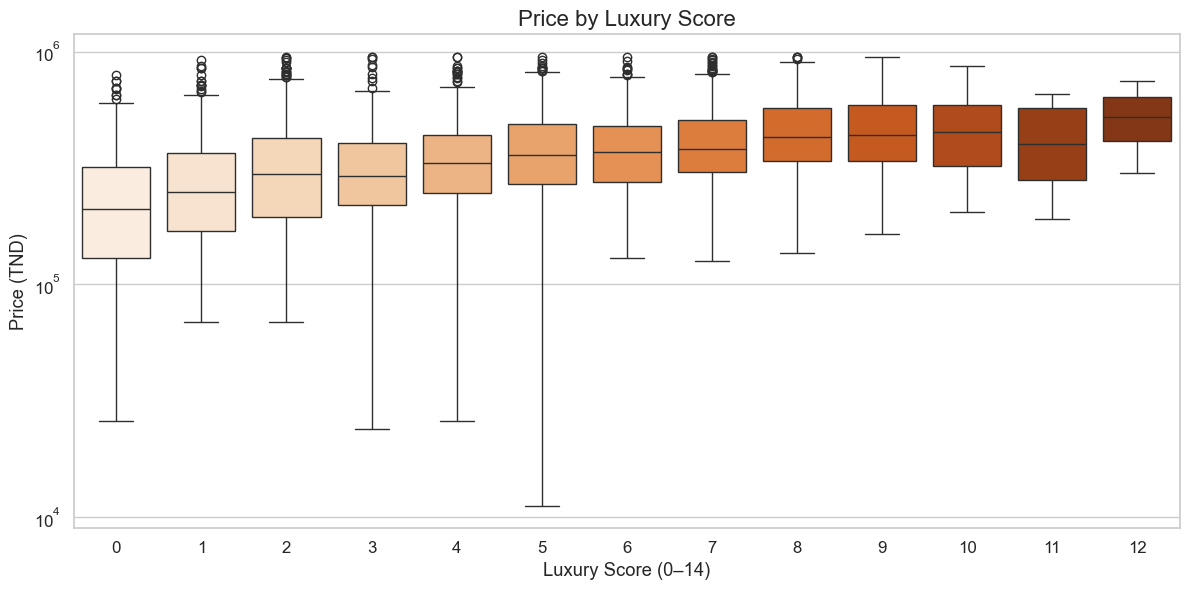

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="luxury_score", y="price_num", palette="Oranges")
plt.title("Price by Luxury Score", fontsize=16)
plt.ylabel("Price (TND)"); plt.yscale("log")
plt.xlabel("Luxury Score (0–14)")
plt.tight_layout(); plt.show()

#### Price vs Number of Rooms

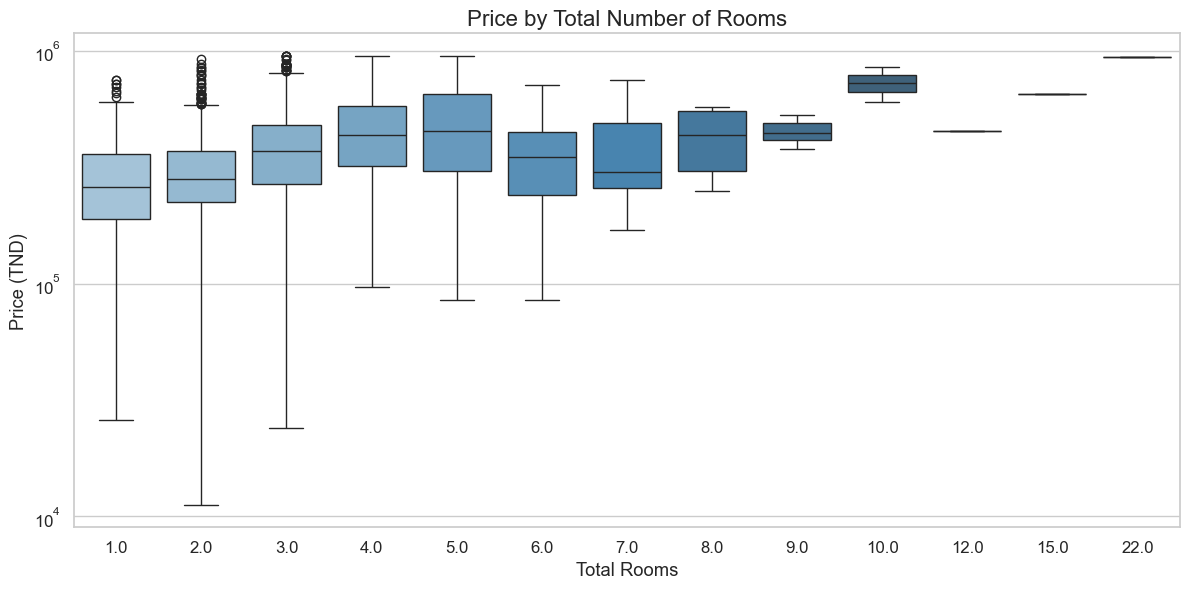

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot.dropna(subset=["n_pieces"]), x="n_pieces", y="price_num", palette="Blues_d")
plt.title("Price by Total Number of Rooms", fontsize=16)
plt.ylabel("Price (TND)"); plt.yscale("log")
plt.xlabel("Total Rooms")
plt.tight_layout(); plt.show()

#### Price Summary Statistics

In [40]:
print("\n" + "="*60)
print("PRICE STATISTICS (df_plot)")
print("="*60)
stats = df_plot["price_num"].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).round(0)
print(stats)

print(f"\n   • 95% of apartments cost ≤ {int(stats['95%']):,} TND")
print(f"   • 99% of apartments cost ≤ {int(stats['99%']):,} TND")
print(f"   • Median price: {int(stats['50%']):,} TND")
print(f"   • Average price: {df_plot['price_num'].mean():,.0f} TND")
print(f"   • Price/m² (median): {df_plot['price_per_m2'].median():,.0f} TND/m²")


PRICE STATISTICS (df_plot)
count     3,565
mean    375,706
std     178,036
min      11,210
1%       91,280
5%      140,000
25%     245,000
50%     350,000
75%     470,000
95%     730,000
99%     876,728
max     950,000
Name: price_num, dtype: float64

   • 95% of apartments cost ≤ 730,000 TND
   • 99% of apartments cost ≤ 876,728 TND
   • Median price: 350,000 TND
   • Average price: 375,706 TND
   • Price/m² (median): 3,238 TND/m²


## ANALYSIS OF THE surface VARIABLE

#### Surface Distribution (Histogram + KDE)

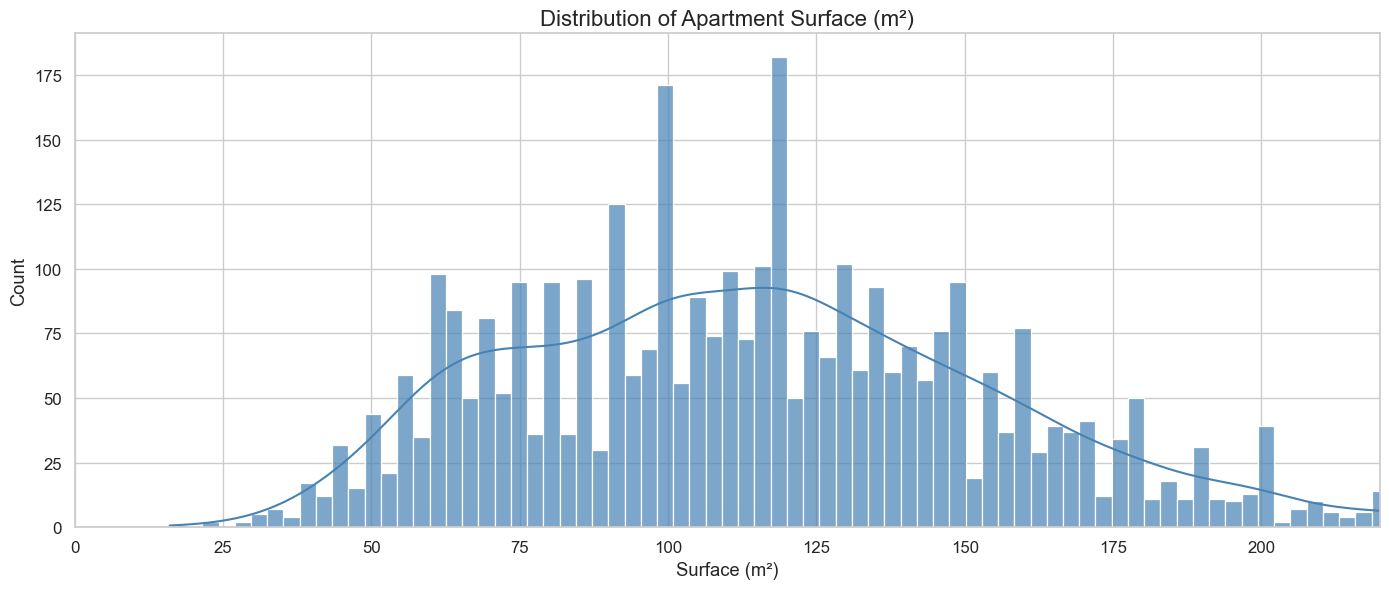

In [41]:
plt.figure(figsize=(14, 6))
sns.histplot(df_plot["surface_m2"], bins=80, kde=True, color="steelblue", alpha=0.7)
plt.title("Distribution of Apartment Surface (m²)", fontsize=16)
plt.xlabel("Surface (m²)"); plt.ylabel("Count")
plt.xlim(0, df_plot["surface_m2"].quantile(0.99))  # Cut extreme tail
plt.tight_layout(); plt.show()

### Bubble chart: price vs surface 


Plotting top 20 cities (1,951 listings)


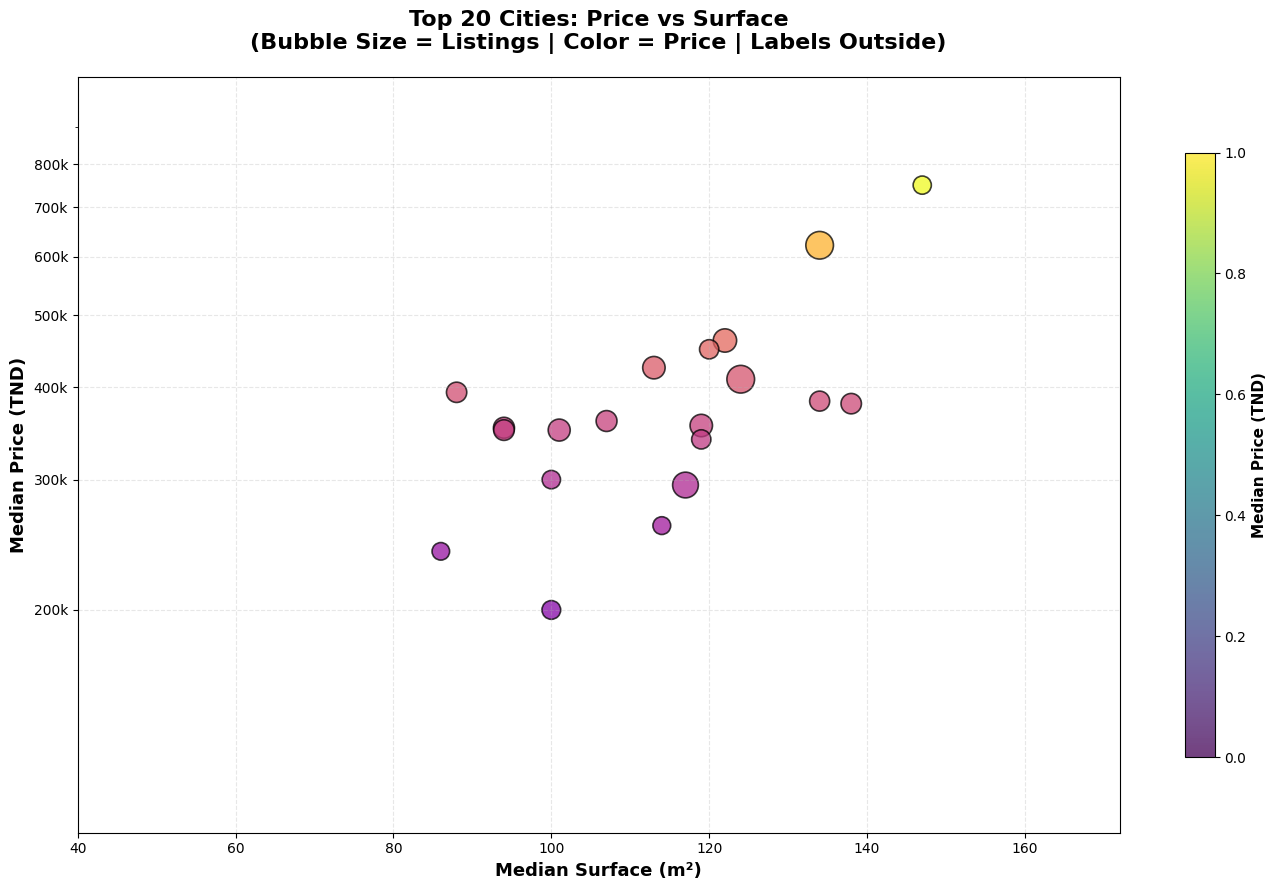

In [42]:


df_plot = df_plot.dropna(subset=['ville', 'price_num', 'surface_m2'])

agg = (
    df_plot.groupby('ville')
    .agg(
        median_price=('price_num', 'median'),
        median_surface=('surface_m2', 'median'),
        listings=('ville', 'size')
    )
    .query('listings >= 10')          # Keep cities with 10+ listings
    .round(0)
)

top20 = agg.sort_values('listings', ascending=False).head(20).copy()
top20 = top20.sort_values('median_price', ascending=False)  # Sort by price

print(f"Plotting top {len(top20)} cities ({top20['listings'].sum():,} listings)")


sizes = np.sqrt(top20['listings']) * 25
sizes = np.clip(sizes, 100, 2000)

colors = plt.cm.plasma(top20['median_price'] / top20['median_price'].max())


plt.figure(figsize=(14, 9))
plt.style.use('default')

scatter = plt.scatter(
    top20['median_surface'],
    top20['median_price'],
    s=sizes,
    c=colors,
    alpha=0.75,
    edgecolors='black',
    linewidth=1.2
)


plt.xlim(40, top20['median_surface'].max() + 25)
plt.ylim(1e5, top20['median_price'].max() * 1.4)

plt.xlabel('Median Surface (m²)', fontsize=13, fontweight='bold')
plt.ylabel('Median Price (TND)', fontsize=13, fontweight='bold')
plt.title('Top 20 Cities: Price vs Surface\n'
          '(Bubble Size = Listings | Color = Price | Labels Outside)',
          fontsize=16, fontweight='bold', pad=20)

# Log scale + clean ticks
plt.yscale('log')
plt.yticks([2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5],
           ['200k', '300k', '400k', '500k', '600k', '700k', '800k'])

# Colorbar
cbar = plt.colorbar(scatter, shrink=0.8)
cbar.set_label('Median Price (TND)', fontsize=11, fontweight='bold')

# Light grid
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

#### Surface by Quartier (Top 15 Largest Median Surface)

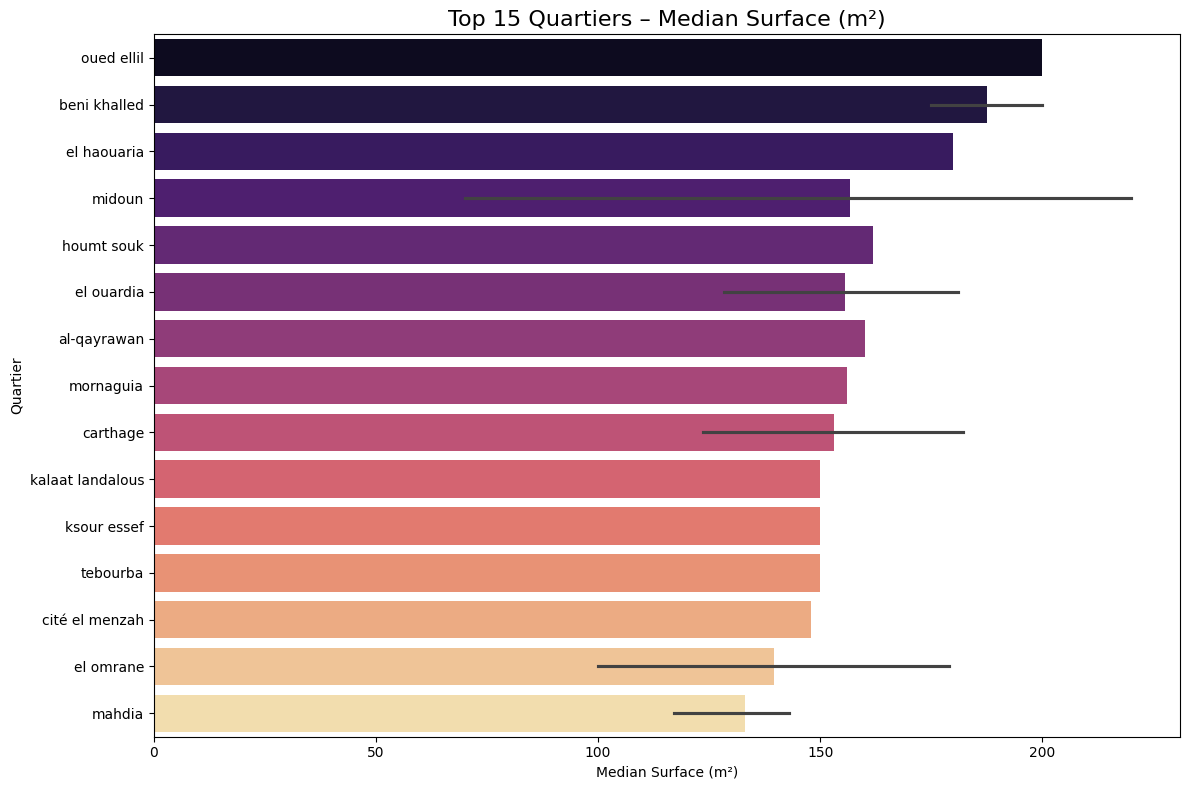

In [43]:
top_surface_quartiers = (
    df_plot.groupby("quartier")["surface_m2"]
    .median()
    .sort_values(ascending=False)
    .head(15)
    .index
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_plot[df_plot["quartier"].isin(top_surface_quartiers)],
    y="quartier", x="surface_m2",
    order=top_surface_quartiers, palette="magma"
)
plt.title("Top 15 Quartiers – Median Surface (m²)", fontsize=16)
plt.xlabel("Median Surface (m²)"); plt.ylabel("Quartier")
plt.tight_layout(); plt.show()

#### Surface vs Luxury Score

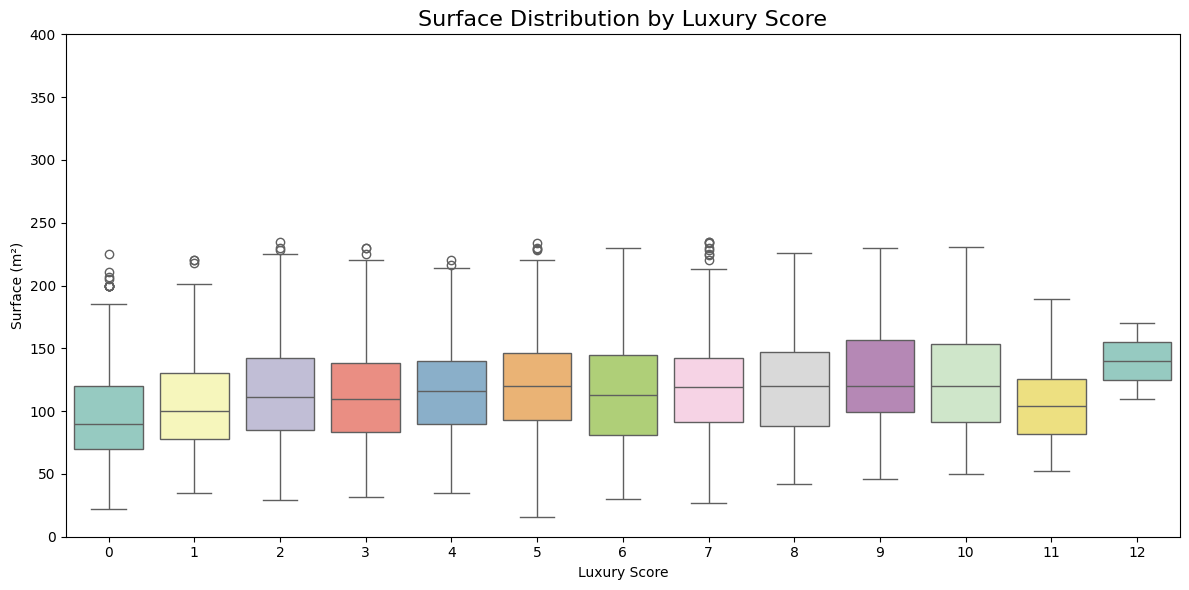

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="luxury_score", y="surface_m2", palette="Set3")
plt.title("Surface Distribution by Luxury Score", fontsize=16)
plt.xlabel("Luxury Score"); plt.ylabel("Surface (m²)")
plt.ylim(0, 400)
plt.tight_layout(); plt.show()

#### Surface by Price Tier

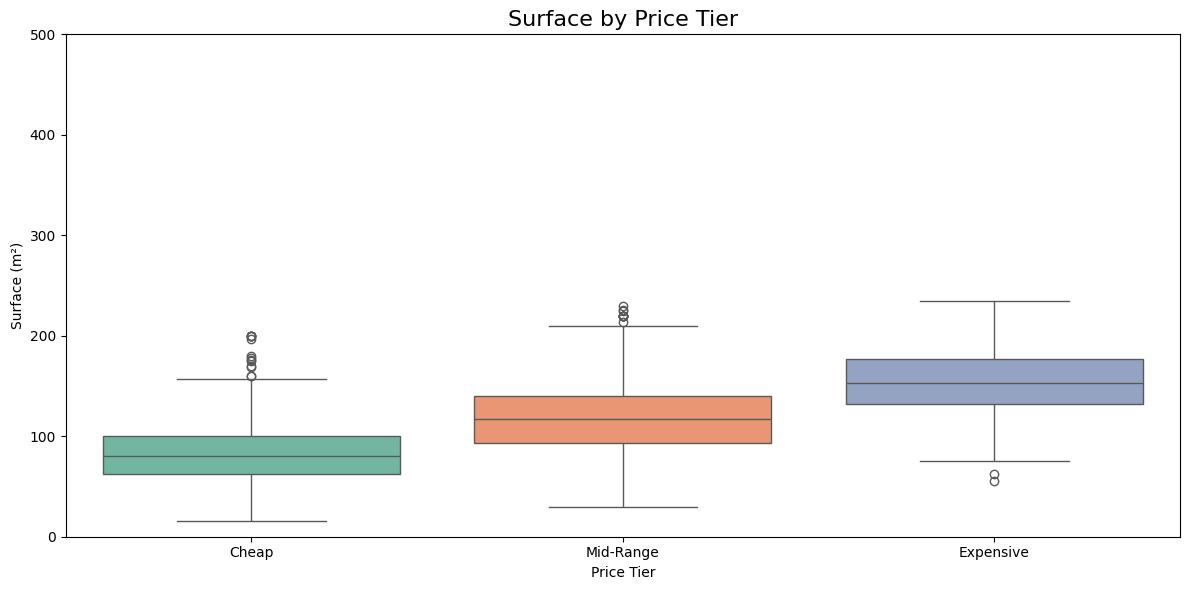

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x="price_tier", y="surface_m2",
            order=["Cheap", "Mid-Range", "Expensive"], palette="Set2")
plt.title("Surface by Price Tier", fontsize=16)
plt.xlabel("Price Tier"); plt.ylabel("Surface (m²)")
plt.ylim(0, 500)
plt.tight_layout(); plt.show()

#### Surface vs Studio Flag

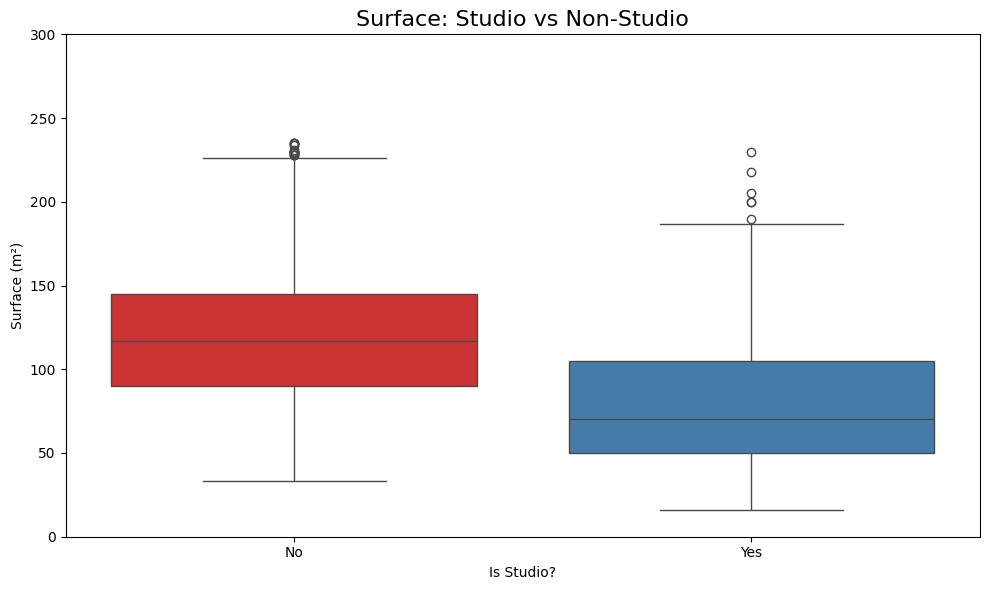

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x="is_studio", y="surface_m2", palette="Set1")
plt.title("Surface: Studio vs Non-Studio", fontsize=16)
plt.xlabel("Is Studio?"); plt.ylabel("Surface (m²)")
plt.xticks([0, 1], ["No", "Yes"])
plt.ylim(0, 300)
plt.tight_layout(); plt.show()

#### Surface Statistics Summary

In [47]:
print("\n" + "="*60)
print("SURFACE STATISTICS (df_plot – valid surface_m2)")
print("="*60)
stats = df_plot["surface_m2"].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).round(1)
print(stats)

print(f"\n   • 95% of apartments are ≤ {stats['95%']:,} m²")
print(f"   • 99% of apartments are ≤ {stats['99%']:,} m²")
print(f"   • Median surface: {stats['50%']:,} m²")
print(f"   • Average surface: {df_plot['surface_m2'].mean():.1f} m²")


SURFACE STATISTICS (df_plot – valid surface_m2)
count   3,455
mean      115
std        40
min        16
1%         40
5%         55
25%        85
50%       113
75%       142
95%       187
99%       220
max       235
Name: surface_m2, dtype: float64

   • 95% of apartments are ≤ 187.3 m²
   • 99% of apartments are ≤ 220.0 m²
   • Median surface: 113.0 m²
   • Average surface: 115.0 m²


## Location Analysis

#### Top 10 Locations by Number of Properties

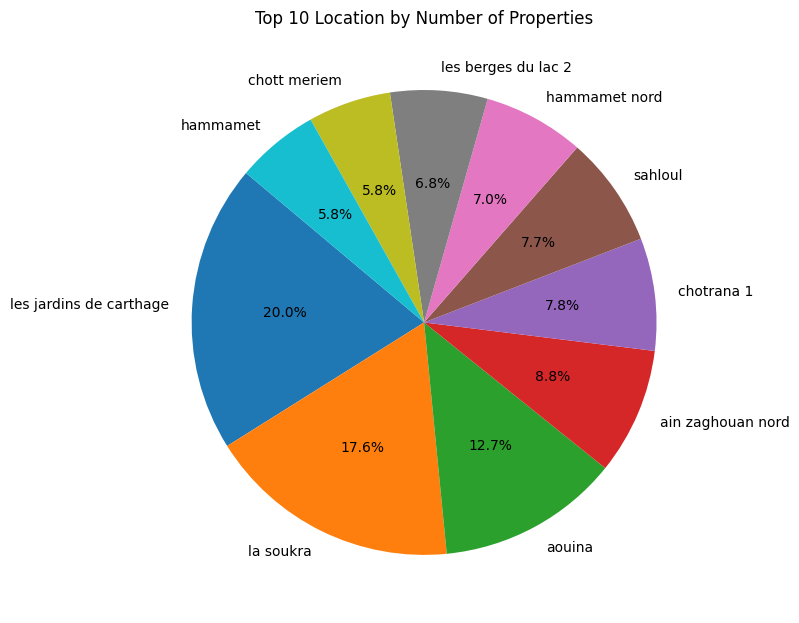

In [48]:
top10 = df_eng['ville'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(
    top10.values, 
    labels=top10.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Top 10 Location by Number of Properties")
plt.tight_layout()
plt.show()


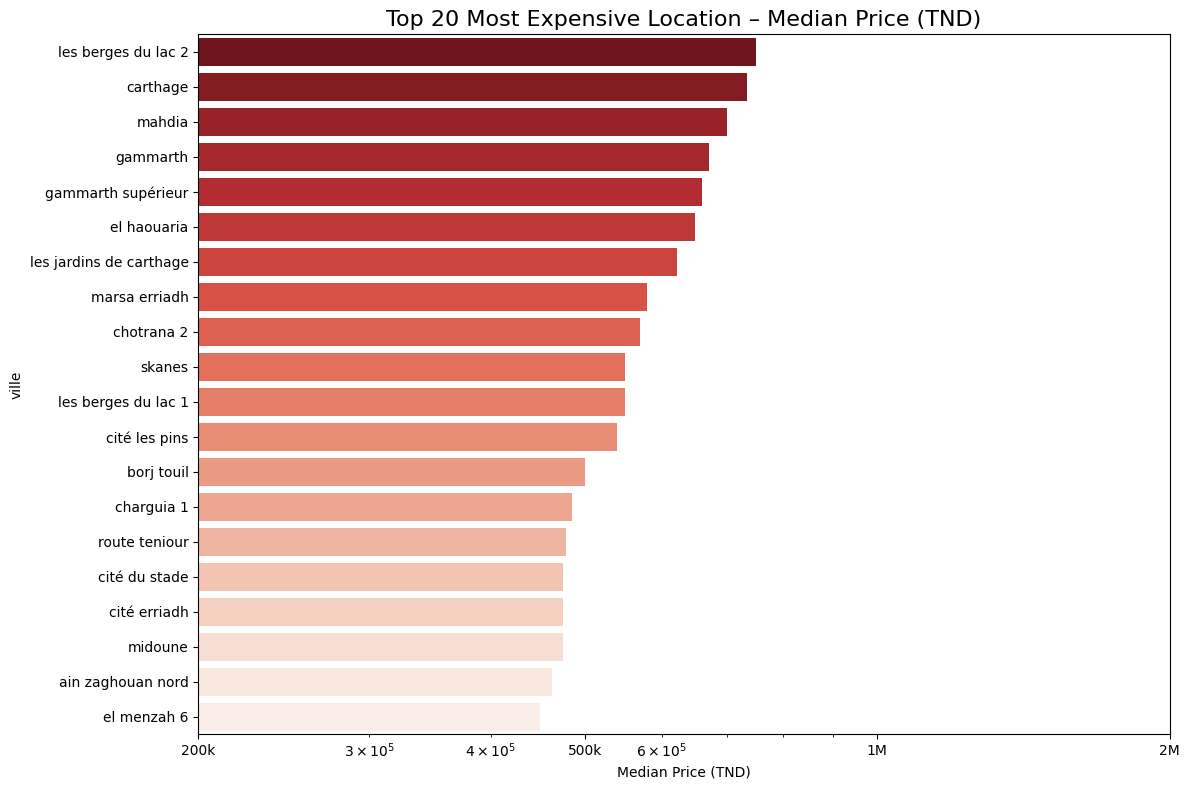

In [49]:
city_price = df_plot.groupby("ville")["price_num"].median().sort_values(ascending=False)
top_price_cities = city_price.head(20).index

plt.figure(figsize=(12, 8))
sns.barplot(x=city_price[top_price_cities], y=top_price_cities, palette="Reds_r")
plt.title("Top 20 Most Expensive Location – Median Price (TND)", fontsize=16)
plt.xlabel("Median Price (TND)"); plt.xscale("log")
plt.xticks([2e5, 5e5, 1e6, 2e6], ["200k", "500k", "1M", "2M"])
plt.tight_layout(); plt.show()

#### Luxury Score by (Top 15)

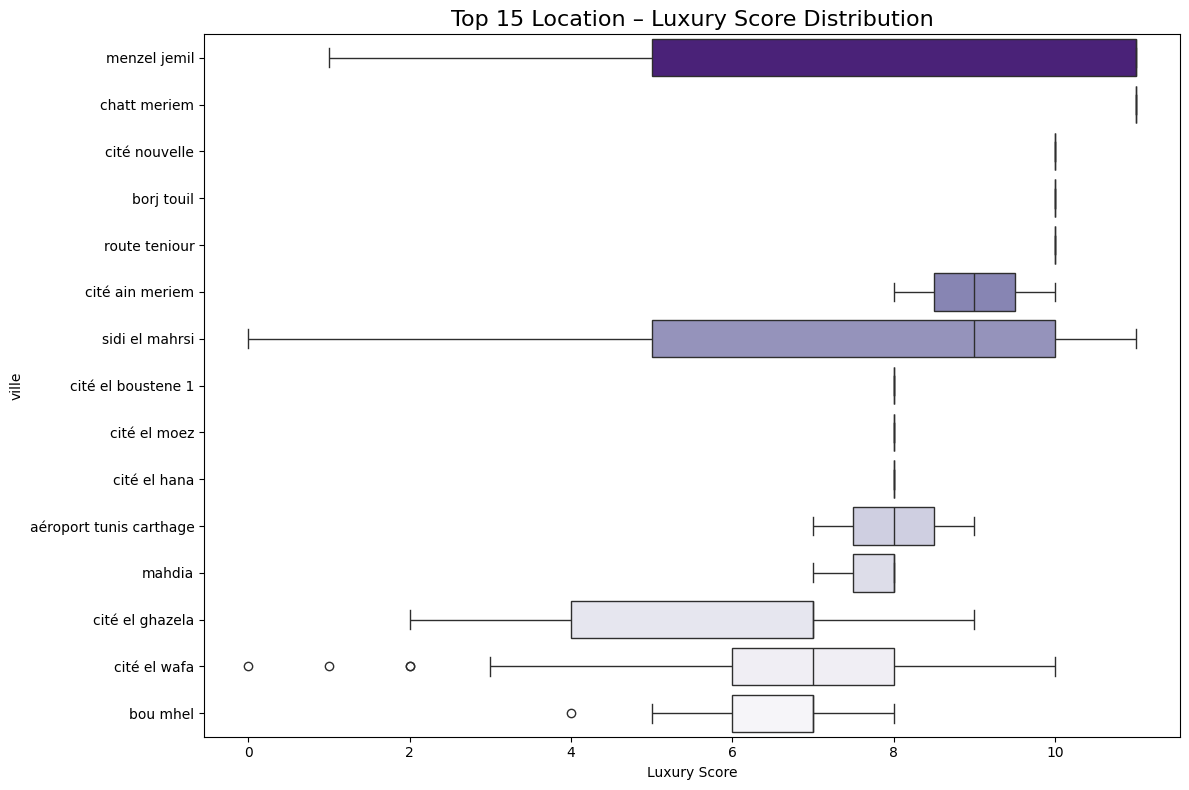

In [50]:
top_luxury_cities = df_plot.groupby("ville")["luxury_score"].median().sort_values(ascending=False).head(15).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_plot[df_plot["ville"].isin(top_luxury_cities)], y="ville", x="luxury_score", order=top_luxury_cities, palette="Purples_r")
plt.title("Top 15 Location – Luxury Score Distribution", fontsize=16)
plt.xlabel("Luxury Score")
plt.tight_layout(); plt.show()

#### Studio % per City (Top 15)

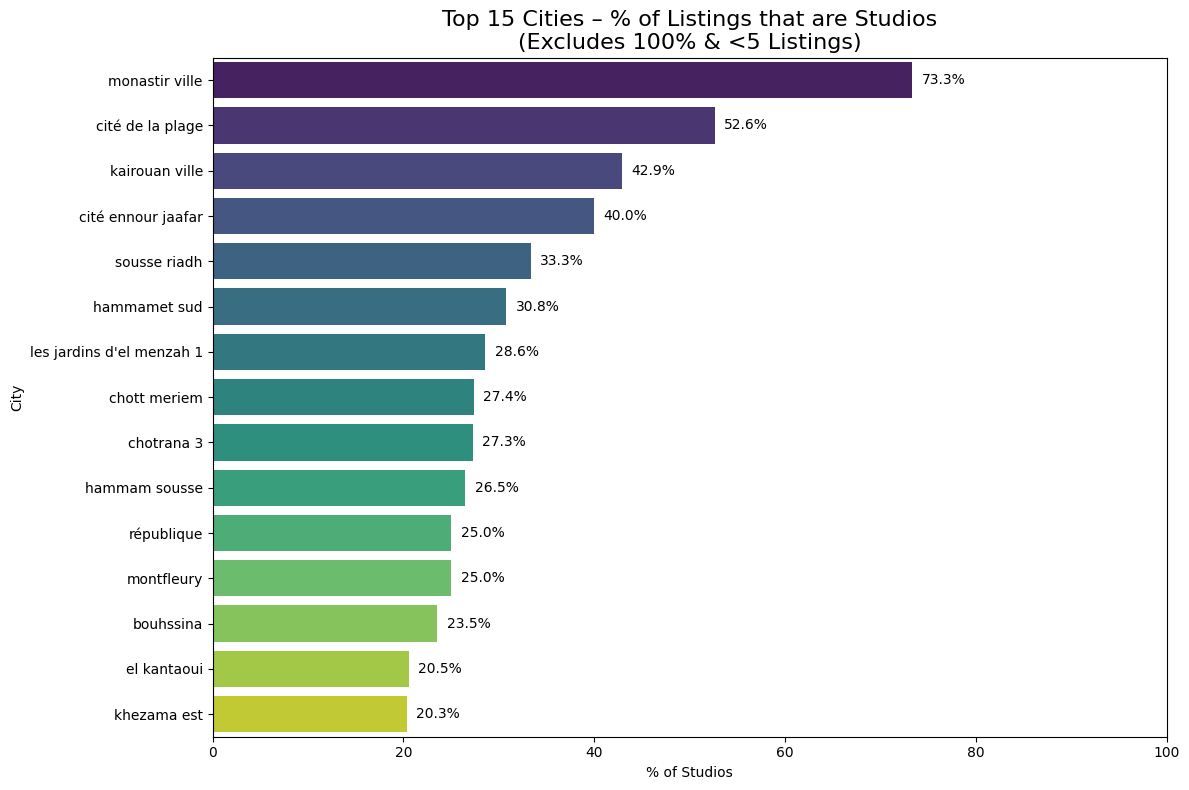

In [51]:

# Calculate % of studios per city
city_studio = (
    df_plot.groupby("ville")["is_studio"]
    .mean() * 100
)

# Exclude cities with 100% studios OR less than 5 listings
city_counts = df_plot["ville"].value_counts()
valid_cities = city_counts[city_counts >= 5].index
city_studio = city_studio[city_studio.index.isin(valid_cities)]
city_studio = city_studio[city_studio < 100]  # Remove 100%

# Top 15 cities with highest % studios (but < 100%)
top_studio_cities = city_studio.sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
bars = sns.barplot(
    x=top_studio_cities.values,
    y=top_studio_cities.index,
    palette="viridis"
)

plt.title("Top 15 Cities – % of Listings that are Studios\n(Excludes 100% & <5 Listings)", fontsize=16)
plt.xlabel("% of Studios")
plt.ylabel("City")

# Add % labels
for i, v in enumerate(top_studio_cities.values):
    plt.text(v + 1, i, f"{v:.1f}%", va="center", fontsize=10)

plt.xlim(0, 100)
plt.tight_layout()
plt.show()

#### City Summary Table (Top 15 by Listings)

In [52]:
summary = (
    df_plot.groupby('ville')
    .agg(
        listings=('ville', 'size'),
        median_price=('price_num', 'median'),
        median_surface=('surface_m2', 'median'),
        median_ppm2=('price_per_m2', 'median'),
        luxury_score=('luxury_score', 'median'),
        studio_pct=('is_studio', 'mean')
    )
    .round(0)
    .assign(studio_pct=lambda x: (x['studio_pct'] * 100).round(1))
    .nlargest(15, 'listings')
)

print("\n" + "="*100)
print("TOP 15 CITIES – FULL SUMMARY")
print("="*100)
print(summary[['listings', 'median_price', 'median_surface', 'median_ppm2', 'luxury_score', 'studio_pct']])
print("="*100)


TOP 15 CITIES – FULL SUMMARY
                         listings  median_price  median_surface  median_ppm2  \
ville                                                                          
la soukra                     253       410,000             124        3,500   
les jardins de carthage       250       622,000             134        5,071   
aouina                        189       295,000             117        2,833   
ain zaghouan nord             128       462,500             122        3,709   
chotrana 1                    109       425,000             113        3,987   
sahloul                       109       355,000             119        3,140   
hammamet nord                 101       350,000             101        3,533   
chott meriem                   84       352,500              94        3,913   
hammamet                       82       360,000             107        3,333   
cité el wafa                   78       350,000              94        3,772   
cité ennas

### "Vue Mer = +XX% ?" – Prime réelle de la vue sur mer

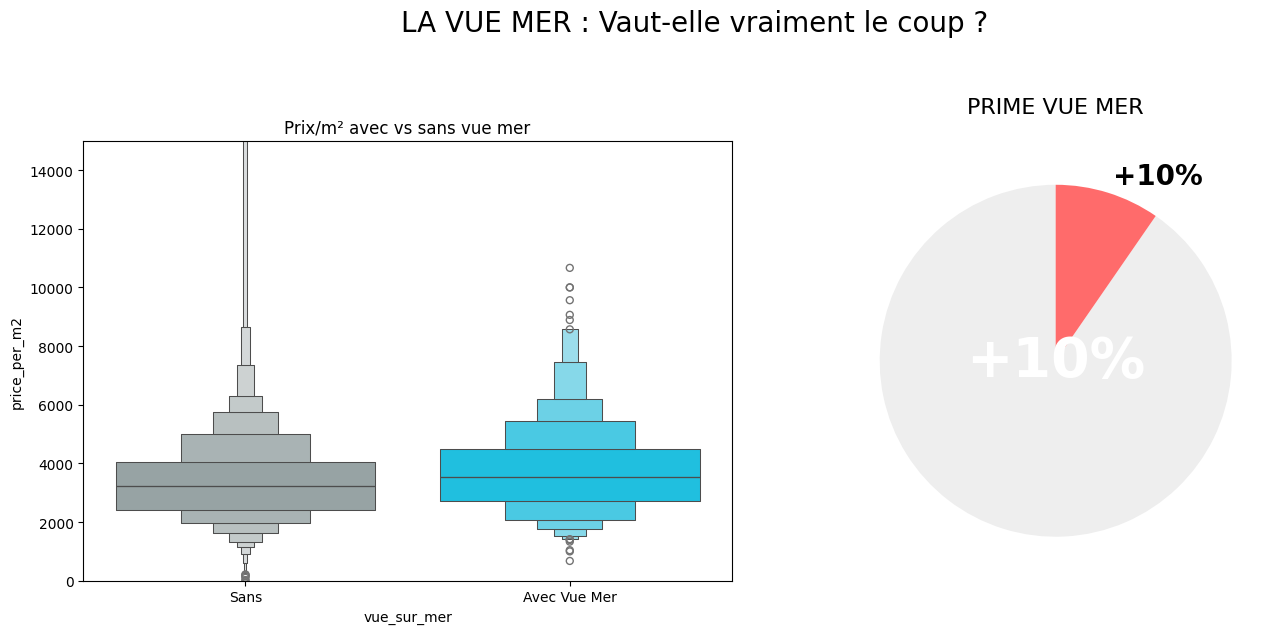

In [53]:
vue_mer = df[df['vue_sur_mer'] == 1]['price_per_m2'].median()
sans = df[df['vue_sur_mer'] == 0]['price_per_m2'].median()
prime = ((vue_mer / sans) - 1) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.boxenplot(data=df, x='vue_sur_mer', y='price_per_m2', palette=['#95a5a6', '#00d4ff'], ax=ax1)
ax1.set_ylim(0, 15000)
ax1.set_title('Prix/m² avec vs sans vue mer')
ax1.set_xticklabels(['Sans', 'Avec Vue Mer'])

# Cercle géant avec la prime
ax2.pie([100-prime, prime], labels=['', f'+{prime:.0f}%'], colors=['#eee', '#ff6b6b'],
        startangle=90, textprops={'fontsize': 20, 'fontweight': 'bold'})
ax2.text(0, 0, f'+{prime:.0f}%', ha='center', va='center', fontsize=40, fontweight='bold', color='white')
ax2.set_title('PRIME VUE MER', fontsize=16, pad=20)

plt.suptitle('LA VUE MER : Vaut-elle vraiment le coup ?', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

## BINARY VARIABLES ANALYSIS

In [54]:
# ==============================================================
# 10. BINARY AMENITIES IMPACT – % PRICE PREMIUM (LIKE YOUR PLOT)
# ==============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (16, 8)

# ------------------------------------------------------------------
# 1. Define binary columns (Int64 = 0/1)
# ------------------------------------------------------------------
binary_cols = [
    'ascenseur', 'piscine', 'terrasse', 'vue_sur_mer', 'garage',
    'climatisation', 'chauffage_central', 'securite', 'concierge',
    'jardin', 'porte_blinde', 'double_vitrage', 'cuisine_equipee',
    'meuble', 'is_studio', 'is_coastal'
]

# Keep only existing + valid binary columns
binary_cols = [col for col in binary_cols if col in df_plot.columns and df_plot[col].dtype == 'Int64']

# ------------------------------------------------------------------
# 2. Compute median price/m² with vs without each amenity
# ------------------------------------------------------------------
results = []

for col in binary_cols:
    with_amenity = df_plot[df_plot[col] == 1]["price_per_m2"]
    without_amenity = df_plot[df_plot[col] == 0]["price_per_m2"]
    
    if len(with_amenity) < 10 or len(without_amenity) < 10:
        continue  # Skip if too few samples
    
    med_with = with_amenity.median()
    med_without = without_amenity.median()
    
    if med_without == 0:
        continue
    
    premium_pct = ((med_with - med_without) / med_without) * 100
    results.append({
        'amenity': col.replace('_', ' ').title(),
        'with': med_with,
        'without': med_without,
        'premium_pct': premium_pct,
        'n_with': len(with_amenity),
        'n_without': len(without_amenity)
    })

df_premium = pd.DataFrame(results).round(2)
df_premium = df_premium.sort_values('premium_pct', ascending=False)

print(f"Analyzed {len(df_premium)} binary amenities")

Analyzed 14 binary amenities


In [55]:
# ==============================================================
# 10. BINARY AMENITIES IMPACT – % PRICE PREMIUM (FIXED)
# ==============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (16, 8)

# ------------------------------------------------------------------
# 1. Define binary columns (must be 0/1)
# ------------------------------------------------------------------
binary_cols = [
    'ascenseur', 'piscine', 'terrasse', 'vue_sur_mer', 'garage',
    'climatisation', 'chauffage_central', 'securite', 'concierge',
    'jardin', 'porte_blinde', 'double_vitrage', 'cuisine_equipee',
    'meuble', 'is_studio', 'is_coastal'
]

# Keep only columns that exist AND are binary (0/1)
binary_cols = [
    col for col in binary_cols
    if col in df_plot.columns and df_plot[col].isin([0, 1]).all()
]

# ------------------------------------------------------------------
# 2. Compute median price/m² with vs without each amenity
# ------------------------------------------------------------------
results = []
for col in binary_cols:
    with_ = df_plot[df_plot[col] == 1]["price_per_m2"]
    without_ = df_plot[df_plot[col] == 0]["price_per_m2"]
    
    if len(with_) < 10 or len(without_) < 10:
        continue
    
    med_with = with_.median()
    med_without = without_.median()
    if med_without == 0:
        continue
    
    premium_pct = ((med_with - med_without) / med_without) * 100
    results.append({
        'amenity': col.replace('_', ' ').title(),
        'with': med_with,
        'without': med_without,
        'premium_pct': premium_pct,
        'n_with': len(with_),
        'n_without': len(without_)
    })

df_premium = pd.DataFrame(results).round(2)
df_premium = df_premium.sort_values('premium_pct', ascending=False)

print(f"Analyzed {len(df_premium)} binary amenities")

Analyzed 16 binary amenities


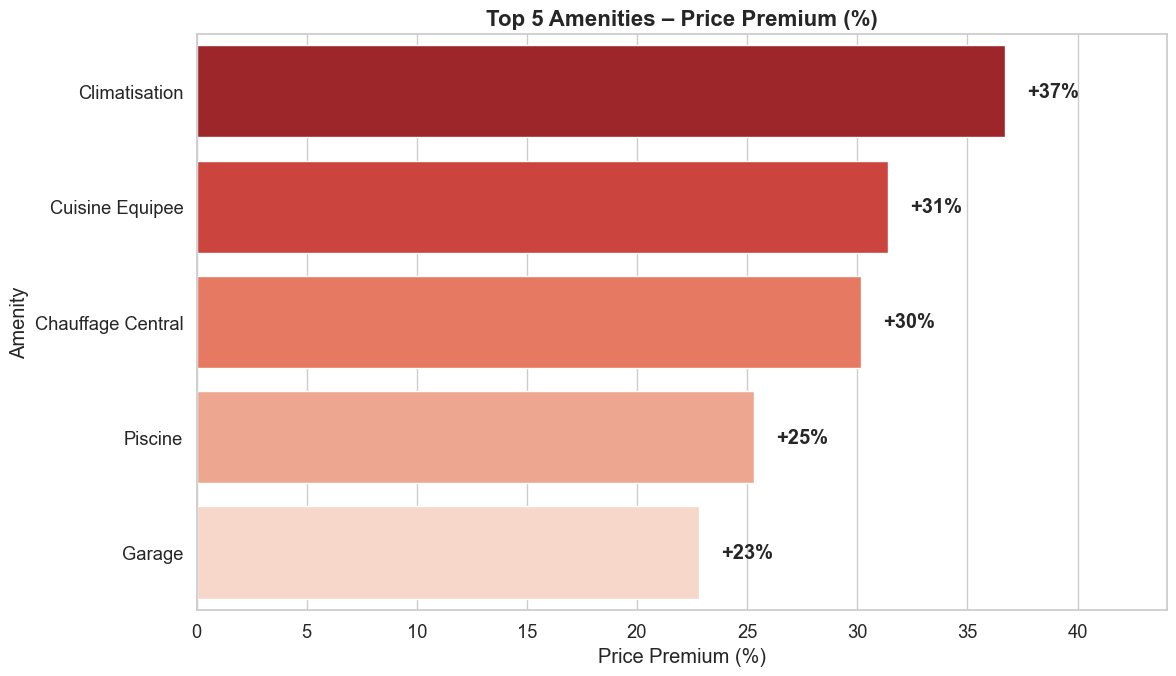

In [56]:
# ------------------------------------------------------------------
# 4. Top 5 Premiums
# ------------------------------------------------------------------
top5 = df_premium.head(5)

plt.figure(figsize=(12, 7))
bars = sns.barplot(
    data=top5,
    y='amenity',
    x='premium_pct',
    palette="Reds_r"
)
plt.title("Top 5 Amenities – Price Premium (%)", fontsize=16, fontweight='bold')
plt.xlabel("Price Premium (%)")
plt.ylabel("Amenity")

for i, v in enumerate(top5['premium_pct']):
    plt.text(v + 1, i, f"+{v:.0f}%", va="center", fontweight='bold')

plt.xlim(0, top5['premium_pct'].max() * 1.2)
plt.tight_layout()
plt.show()

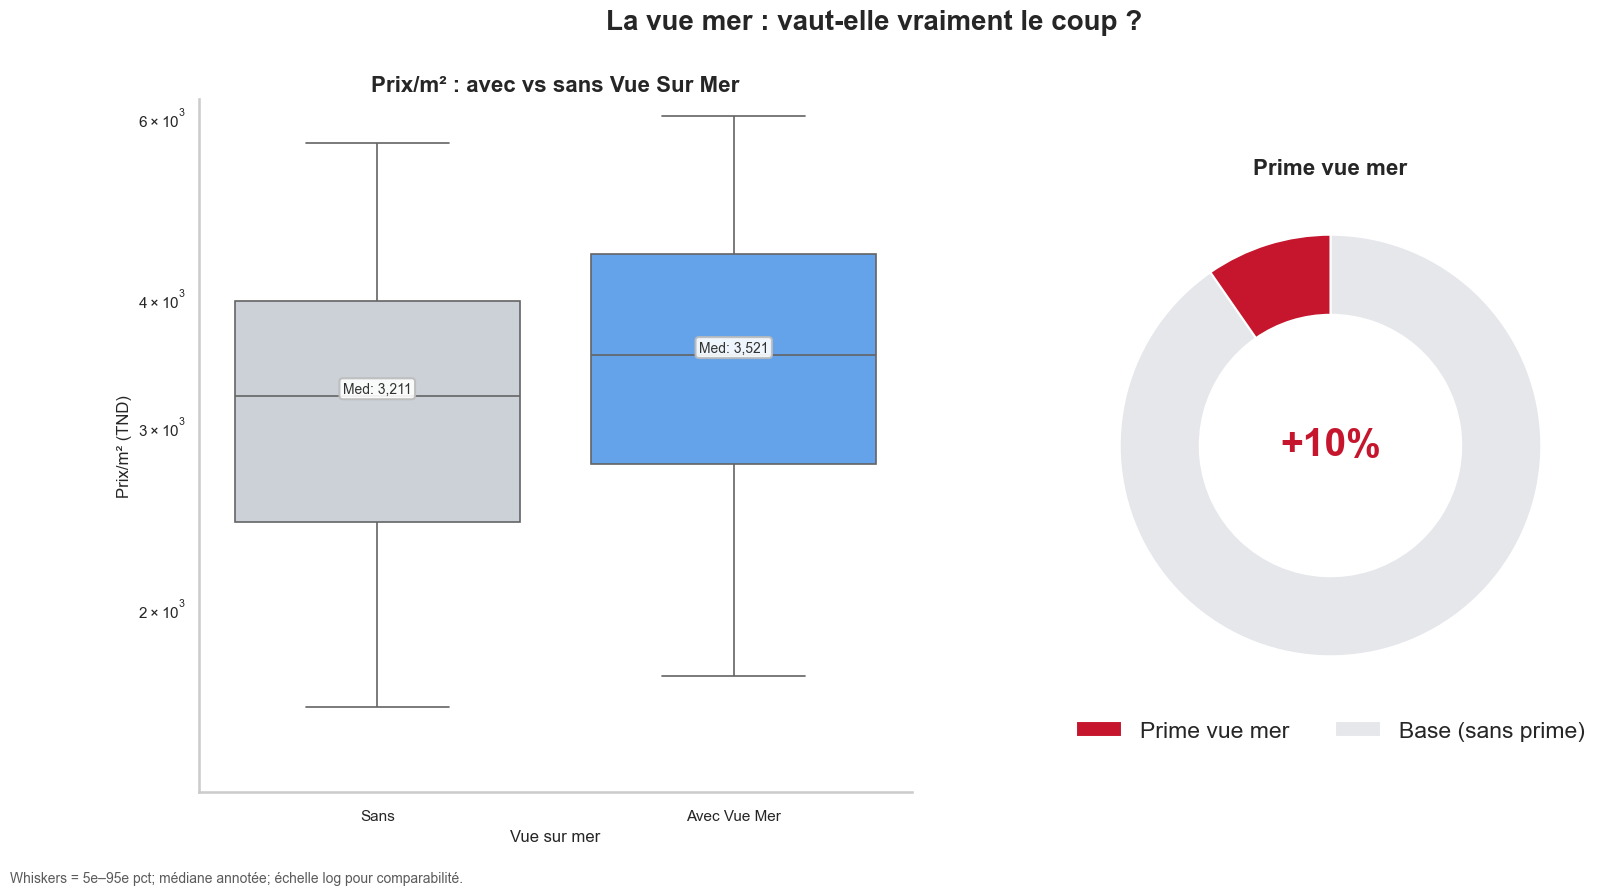

In [57]:
# --- Params ---
focus_amenity = 'Vue Sur Mer'
focus_col = 'vue_sur_mer'

if focus_col not in df_plot.columns:
    raise ValueError(f"Column '{focus_col}' not found in df_plot")

row = df_premium.loc[df_premium['amenity'].eq(focus_amenity)].iloc[0]
premium = float(row['premium_pct'])

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Style global
sns.set_theme(context="talk", style="whitegrid")
mpl.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.titlesize": 16,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

# Palette binaire robuste
palette = {'0': "#C9D1D9", '1': "#4EA1FF"}  # gris doux vs bleu

fig = plt.figure(figsize=(18, 9))
gs = fig.add_gridspec(1, 2, width_ratios=[1.15, 0.85], wspace=0.25)

# === LEFT: Boxplot amélioré ===
ax1 = fig.add_subplot(gs[0, 0])

# S’assure que la colonne est bien string pour la palette
df_box = df_plot.copy()
df_box[focus_col] = df_box[focus_col].astype(str)

# Contrôle des whiskers (5-95e pct) et médianes visibles
sns.boxplot(
    data=df_box,
    x=focus_col,
    y="price_per_m2",
    palette=palette,
    showfliers=False,
    whis=[5, 95],
    linewidth=1.2,
    ax=ax1
)

# Médianes annotées
medians = df_box.groupby(focus_col)["price_per_m2"].median()
for idx, (cat, med) in enumerate(medians.items()):
    ax1.text(
        idx, med,
        f"Med: {med:,.0f}",
        ha="center", va="bottom",
        fontsize=10, color="#333333",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#BBBBBB", alpha=0.9)
    )

ax1.set_title(f"Prix/m² : avec vs sans {focus_amenity}")
ax1.set_xlabel("Vue sur mer")
ax1.set_ylabel("Prix/m² (TND)")
ax1.set_xticklabels(["Sans", "Avec Vue Mer"])

# Log-y avec ticks lisibles
ax1.set_yscale("log")
# Ticks log auto -> remplacer par ticks arrondis si besoin
ymin = max(df_box["price_per_m2"].quantile(0.02), 1)
ymax = df_box["price_per_m2"].quantile(0.98)
ax1.set_ylim(ymin, ymax)
ax1.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda v, p: f"{int(v):,}"))

# Grille légère
ax1.grid(True, axis="y", alpha=0.25)

# === RIGHT: Donut épuré ===
ax2 = fig.add_subplot(gs[0, 1])

# Donut sans autopct sur les tranches (évite doublons), texte central clair
vals = [100 - premium, premium]
colors = ["#E5E7EB", "#C5162D"]  # gris clair, rouge foncé

wedges, _ = ax2.pie(
    vals,
    labels=["", ""],
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.38, edgecolor="white")
)

# Texte central
ax2.text(
    0, 0, f"+{premium:.0f}%",
    ha="center", va="center",
    fontsize=28, fontweight="bold", color="#C5162D"
)

# Légende propre
ax2.legend(
    handles=wedges[::-1],
    labels=["Prime vue mer", "Base (sans prime)"],
    loc="lower center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=2,
    frameon=False
)

ax2.set_title("Prime vue mer")

# === Titre global et footnote ===
fig.suptitle("La vue mer : vaut-elle vraiment le coup ?", y=0.98, fontsize=20, fontweight="bold")

# Source/notes
fig.text(0.02, 0.01, "Whiskers = 5e–95e pct; médiane annotée; échelle log pour comparabilité.", fontsize=10, color="#5B5B5B")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


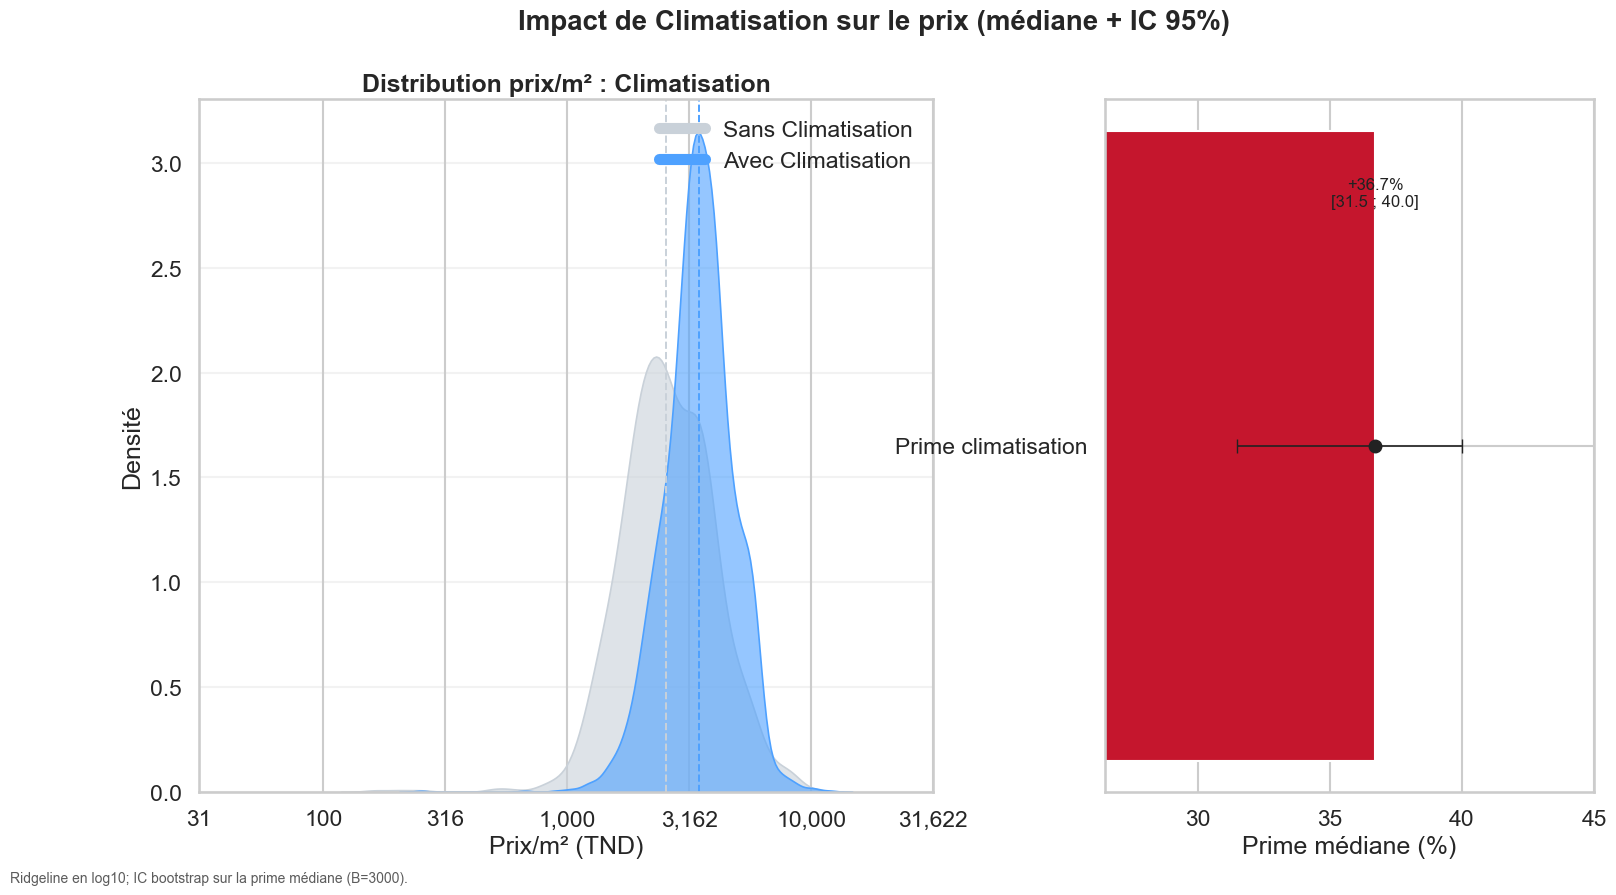

In [58]:
# ==========================================
# Ridgeline + Barre prime avec IC bootstrap
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Paramètres ---
focus_amenity = df_premium.iloc[0]['amenity']  # ex: 'Piscine'
focus_col = focus_amenity.lower().replace(' ', '_')

if focus_col not in df_plot.columns:
    raise ValueError(f"Column '{focus_col}' not found in df_plot")
if not set(df_plot[focus_col].dropna().unique()).issubset({0,1}):
    raise ValueError(f"Column '{focus_col}' must be binary 0/1")

# Données nettoyées
d = df_plot[[focus_col, "price_per_m2"]].dropna().copy()
d = d[d["price_per_m2"] > 0]
d["group"] = np.where(d[focus_col].eq(1), f"Avec {focus_amenity}", f"Sans {focus_amenity}")

# Métriques de base
with_vals = d.loc[d[focus_col].eq(1), "price_per_m2"]
without_vals = d.loc[d[focus_col].eq(0), "price_per_m2"]
med_with = with_vals.median()
med_without = without_vals.median()
premium_hat = 100 * (med_with - med_without) / med_without

# --- Bootstrap IC sur la prime médiane ---
def bootstrap_premium(with_arr, without_arr, B=2000, rng=None):
    rng = np.random.default_rng(rng)
    n1, n0 = len(with_arr), len(without_arr)
    out = np.empty(B)
    for b in range(B):
        s1 = rng.choice(with_arr, size=n1, replace=True)
        s0 = rng.choice(without_arr, size=n0, replace=True)
        m1 = np.median(s1)
        m0 = np.median(s0) if np.median(s0) != 0 else np.nan
        out[b] = 100 * (m1 - m0) / m0 if np.isfinite(m0) and m0 > 0 else np.nan
    return out[~np.isnan(out)]

boot = bootstrap_premium(with_vals.values, without_vals.values, B=3000, rng=42)
ci_low, ci_high = np.percentile(boot, [2.5, 97.5])

# --- Style ---
sns.set_theme(context="talk", style="whitegrid")
palette = {"Sans": "#C9D1D9", "Avec": "#4EA1FF"}

fig = plt.figure(figsize=(18, 9))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 0.8], wspace=0.28)

# ============ LEFT: Ridgeline ============
ax1 = fig.add_subplot(gs[0, 0])

# Préparer deux couches KDE en "ridgeline"
for i, (label, color) in enumerate([(f"Sans {focus_amenity}", palette["Sans"]),
                                    (f"Avec {focus_amenity}", palette["Avec"])]):
    subset = d.loc[d["group"].eq(label), "price_per_m2"]
    if subset.empty: 
        continue
    # Courbe KDE
    sns.kdeplot(
        np.log10(subset),
        ax=ax1, fill=True, alpha=0.6, linewidth=1.2, color=color
    )
    # Ligne de médiane
    med = np.log10(subset.median())
    ax1.axvline(med, color=color, linestyle="--", linewidth=1.4)

# Axes en log base 10 transform (on affiche ticks en TND)
# Récupère les ticks en log puis re-projette en échelle réelle pour les labels
xticks_log = ax1.get_xticks()
xtick_vals = np.unique(np.clip(10**xticks_log, a_min=1, a_max=None)).astype(int)
ax1.set_xticks(np.log10(xtick_vals))
ax1.set_xticklabels([f"{v:,}" for v in xtick_vals])

ax1.set_title(f"Distribution prix/m² : {focus_amenity}")
ax1.set_xlabel("Prix/m² (TND)")
ax1.set_ylabel("Densité")
ax1.grid(True, axis="y", alpha=0.25)

# Légende personnalisée
handles = [
    plt.Line2D([0], [0], color=palette["Sans"], lw=8, label=f"Sans {focus_amenity}"),
    plt.Line2D([0], [0], color=palette["Avec"], lw=8, label=f"Avec {focus_amenity}")
]
ax1.legend(handles=handles, loc="upper right", frameon=False)

# ============ RIGHT: Barre prime + IC ============
ax2 = fig.add_subplot(gs[0, 1])

bar_color = "#C5162D" if premium_hat >= 0 else "#0B7A75"
ax2.barh([0], [premium_hat], color=bar_color, height=0.4)
# IC
ax2.errorbar(premium_hat, 0, xerr=[[premium_hat - ci_low], [ci_high - premium_hat]],
             fmt="o", color="#222", capsize=5, lw=1.2)

ax2.set_yticks([0])
ax2.set_yticklabels([f"Prime {focus_amenity.lower()}"])
ax2.set_xlabel("Prime médiane (%)")
ax2.set_xlim(min(ci_low, premium_hat) - 5, max(ci_high, premium_hat) + 5)
ax2.axvline(0, color="#999", lw=1, linestyle="--")

# Annotation valeur
ax2.text(premium_hat, 0.15, f"{premium_hat:+.1f}%\n[{ci_low:.1f} ; {ci_high:.1f}]",
         ha="center", va="bottom", fontsize=12, color="#222")

fig.suptitle(f"Impact de {focus_amenity} sur le prix (médiane + IC 95%)",
             y=0.98, fontsize=20, fontweight="bold")
fig.text(0.02, 0.01, "Ridgeline en log10; IC bootstrap sur la prime médiane (B=3000).",
         fontsize=10, color="#5B5B5B")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Sorted Premiums Lollipop Chart

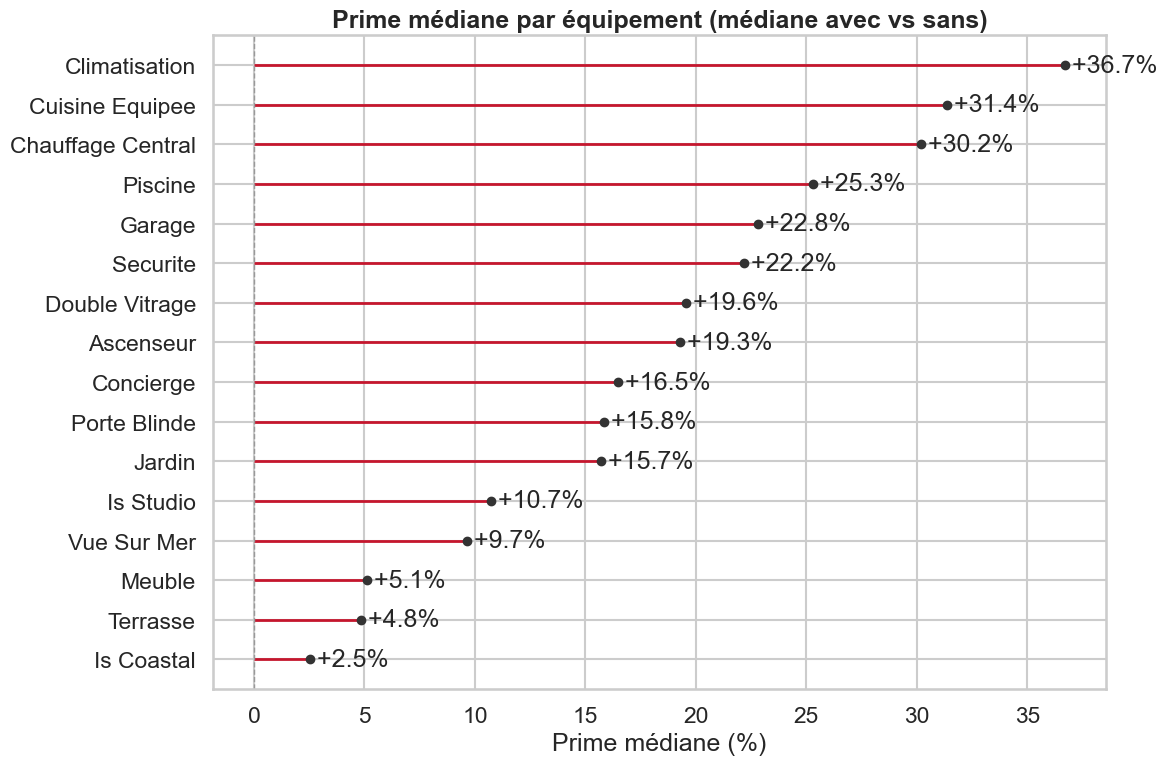

In [59]:
# =====================================
# Lollipop des primes (%) par amenity
# =====================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dfp = df_premium.copy().sort_values("premium_pct", ascending=True)
fig, ax = plt.subplots(figsize=(12, 8))
y = np.arange(len(dfp))

colors = np.where(dfp["premium_pct"] >= 0, "#C5162D", "#0B7A75")
ax.hlines(y, 0, dfp["premium_pct"], color=colors, linewidth=2)
ax.plot(dfp["premium_pct"], y, "o", color="#333", markersize=6)

ax.axvline(0, color="#999", lw=1, linestyle="--")
ax.set_yticks(y)
ax.set_yticklabels(dfp["amenity"])
ax.set_xlabel("Prime médiane (%)")
ax.set_title("Prime médiane par équipement (médiane avec vs sans)")
for yi, val in zip(y, dfp["premium_pct"]):
    ax.text(val, yi, f" {val:+.1f}%", va="center", ha="left" if val>=0 else "right")

plt.tight_layout()
plt.show()


#### Median Heatmap (With vs Without)

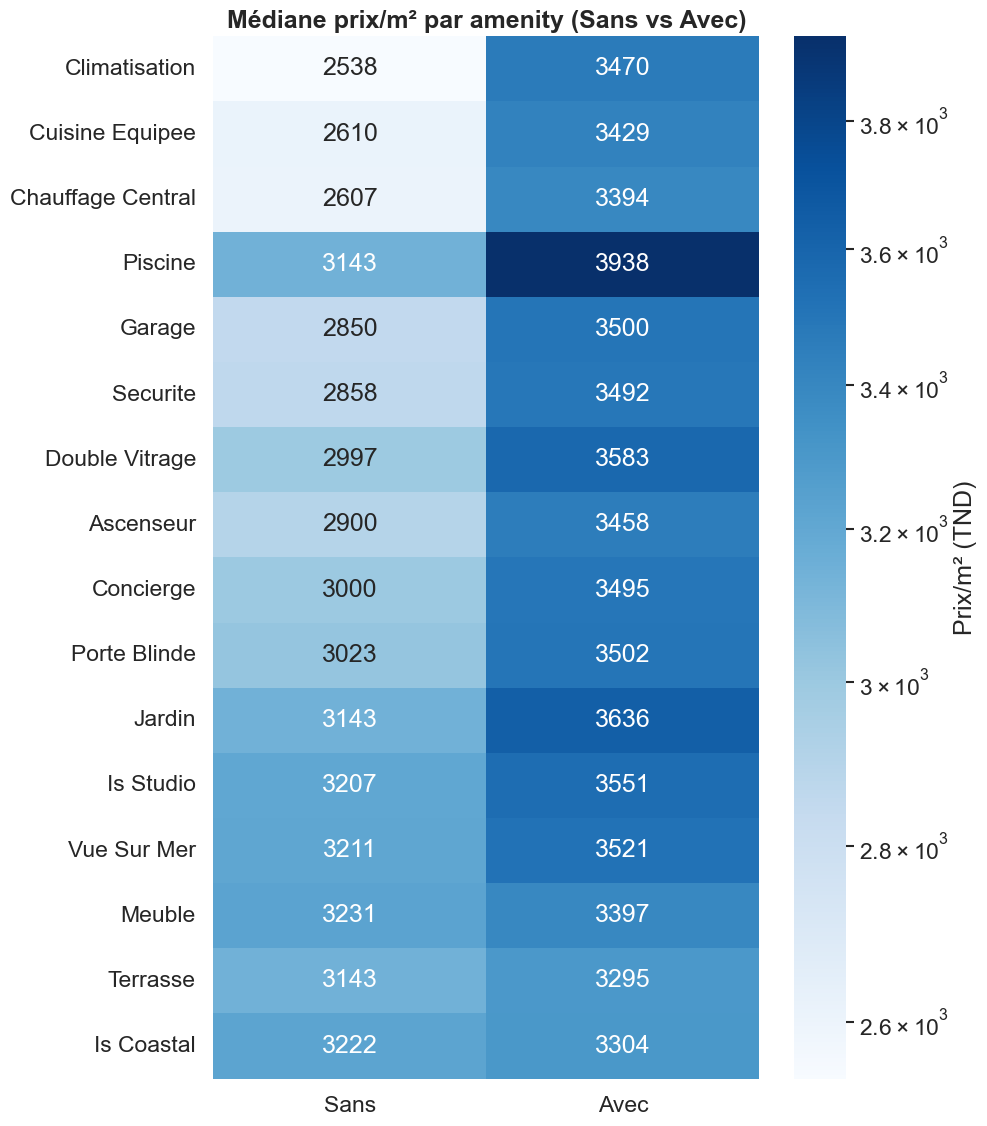

In [60]:
# =====================================
# Heatmap médianes (Sans vs Avec)
# =====================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

dfh = df_premium[["amenity", "without", "with"]].set_index("amenity")
dfh = dfh.rename(columns={"without": "Sans", "with": "Avec"})

fig, ax = plt.subplots(figsize=(10, 0.6*len(dfh)+2))
sns.heatmap(
    dfh,
    norm=LogNorm(vmin=dfh.min().min(), vmax=dfh.max().max()),
    cmap="Blues",
    annot=True, fmt=".0f",
    cbar_kws={"label": "Prix/m² (TND)"},
    ax=ax
)
ax.set_title("Médiane prix/m² par amenity (Sans vs Avec)")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()
plt.show()


#### Dumbbell Plot by Amenity

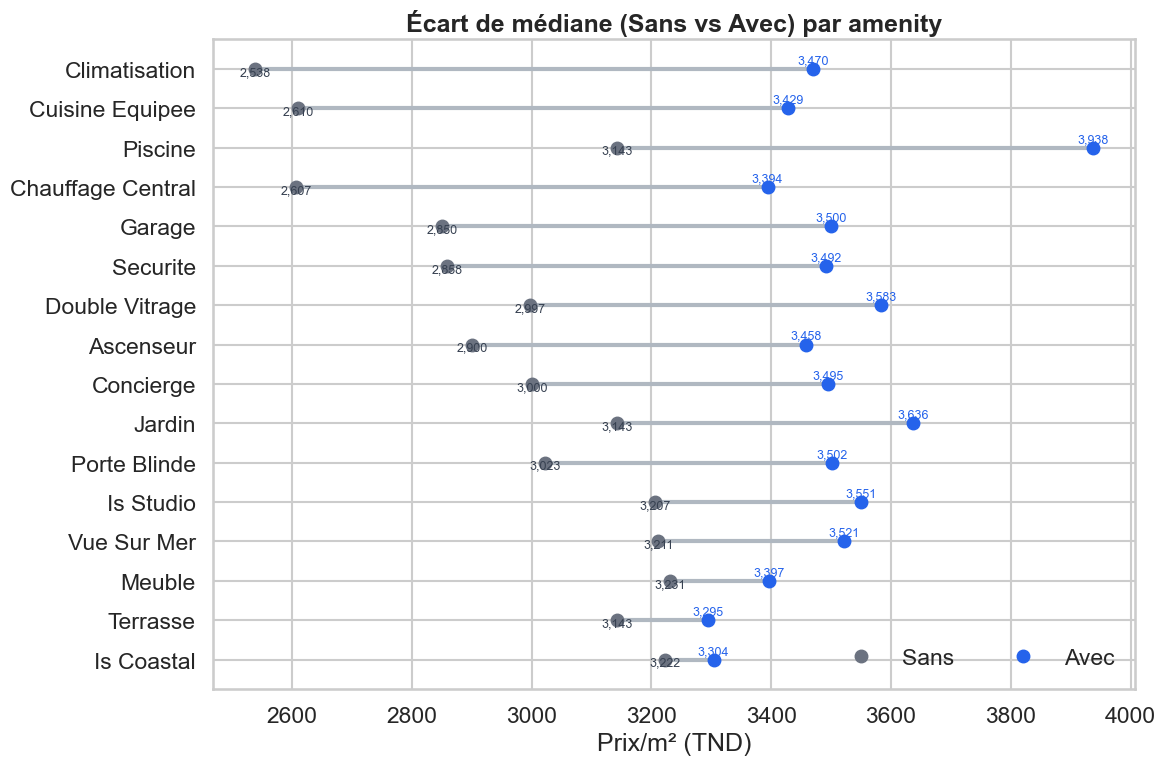

In [61]:
# =====================================
# Dumbbell plot Sans vs Avec
# =====================================
import numpy as np
import matplotlib.pyplot as plt

dumb = df_premium.copy()
dumb["delta"] = dumb["with"] - dumb["without"]
dumb = dumb.sort_values("delta", ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
y = np.arange(len(dumb))
ax.hlines(y, dumb["without"], dumb["with"], color="#B0B8C1", lw=3)
ax.plot(dumb["without"], y, "o", color="#6B7280", label="Sans")
ax.plot(dumb["with"], y, "o", color="#2563EB", label="Avec")

ax.set_yticks(y)
ax.set_yticklabels(dumb["amenity"])
ax.set_xlabel("Prix/m² (TND)")
ax.set_title("Écart de médiane (Sans vs Avec) par amenity")
ax.legend(frameon=False, ncol=2, loc="lower right")

for yi, w, wo in zip(y, dumb["with"], dumb["without"]):
    ax.text(w, yi+0.15, f"{w:,.0f}", ha="center", fontsize=9, color="#2563EB")
    ax.text(wo, yi-0.15, f"{wo:,.0f}", ha="center", fontsize=9, color="#374151")

plt.tight_layout()
plt.show()


### Automatic Facets

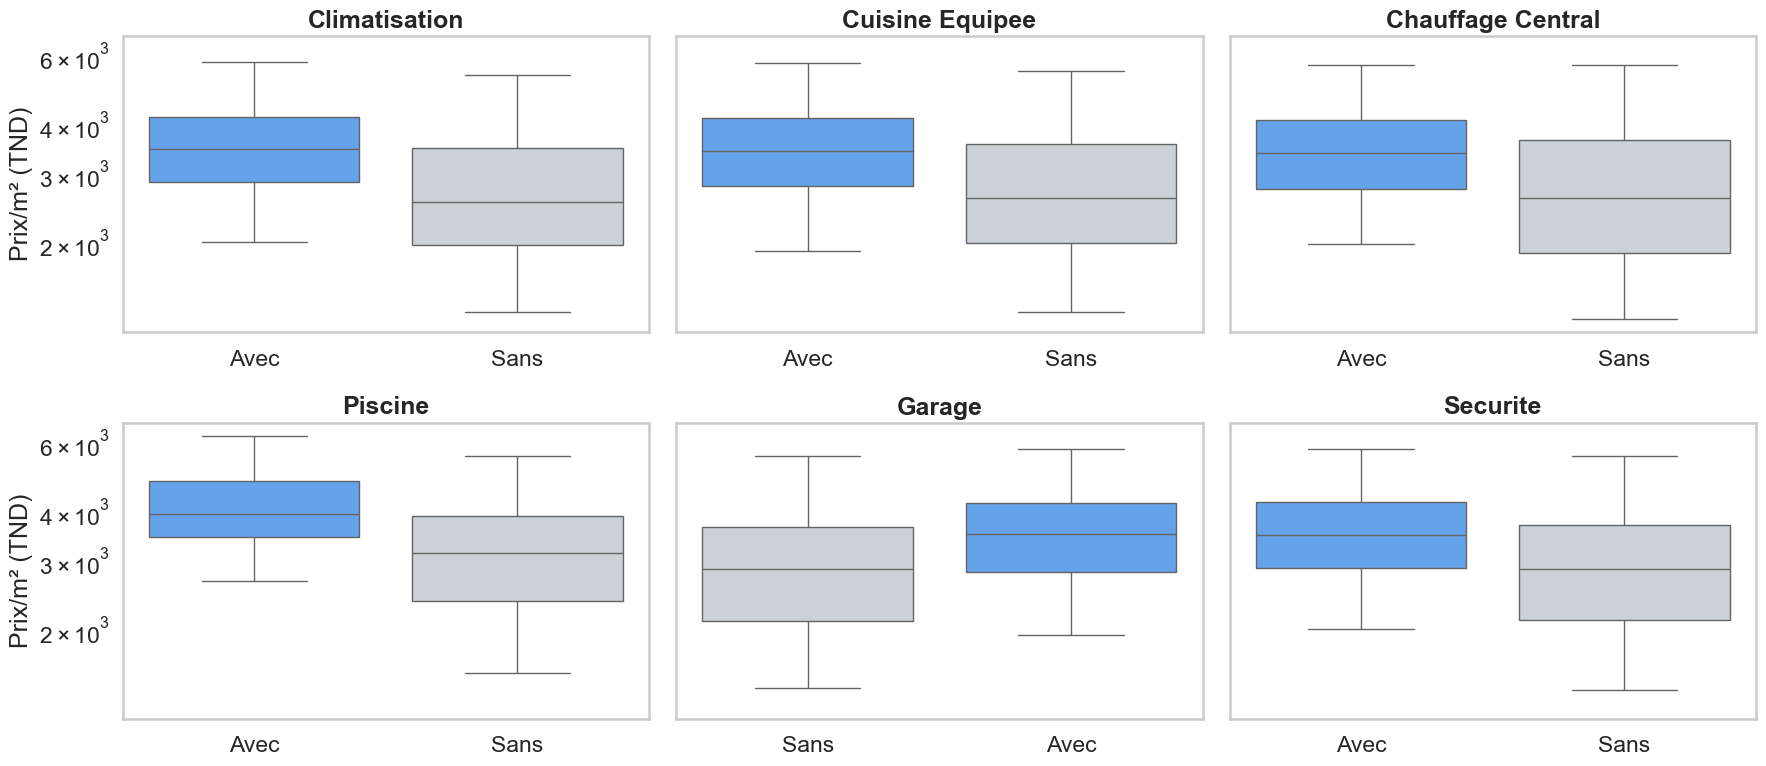

In [62]:
topk = 6
top_amenities = df_premium.nlargest(topk, "premium_pct")["amenity"].tolist()
dfm = df_plot.copy()
for a in top_amenities:
    col = a.lower().replace(" ", "_")
    if col in dfm.columns:
        dfm[a] = dfm[col].map({0: "Sans", 1: "Avec"})
        
import seaborn as sns, matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=True)
axes = axes.ravel()
for i, a in enumerate(top_amenities):
    sns.boxplot(data=dfm, x=a, y="price_per_m2",
                palette={"Sans":"#C9D1D9","Avec":"#4EA1FF"},
                showfliers=False, whis=[5,95], ax=axes[i])
    axes[i].set_title(a)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Prix/m² (TND)" if i%3==0 else "")
    axes[i].set_yscale("log")
plt.tight_layout()
plt.show()


In [63]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3918 entries, 0 to 5046
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price                  3918 non-null   object  
 1   location               3918 non-null   object  
 2   surface                3918 non-null   object  
 3   total_pieces           3300 non-null   object  
 4   bedrooms               3540 non-null   object  
 5   bathrooms              3415 non-null   object  
 6   antenne_parabolique    3918 non-null   Int64   
 7   ascenseur              3918 non-null   Int64   
 8   chambre_rangement      3918 non-null   Int64   
 9   chauffage_central      3918 non-null   Int64   
 10  chemine                3918 non-null   Int64   
 11  climatisation          3918 non-null   Int64   
 12  concierge              3918 non-null   Int64   
 13  cuisine_equipee        3918 non-null   Int64   
 14  double_vitrage         3918 non-null   Int64 

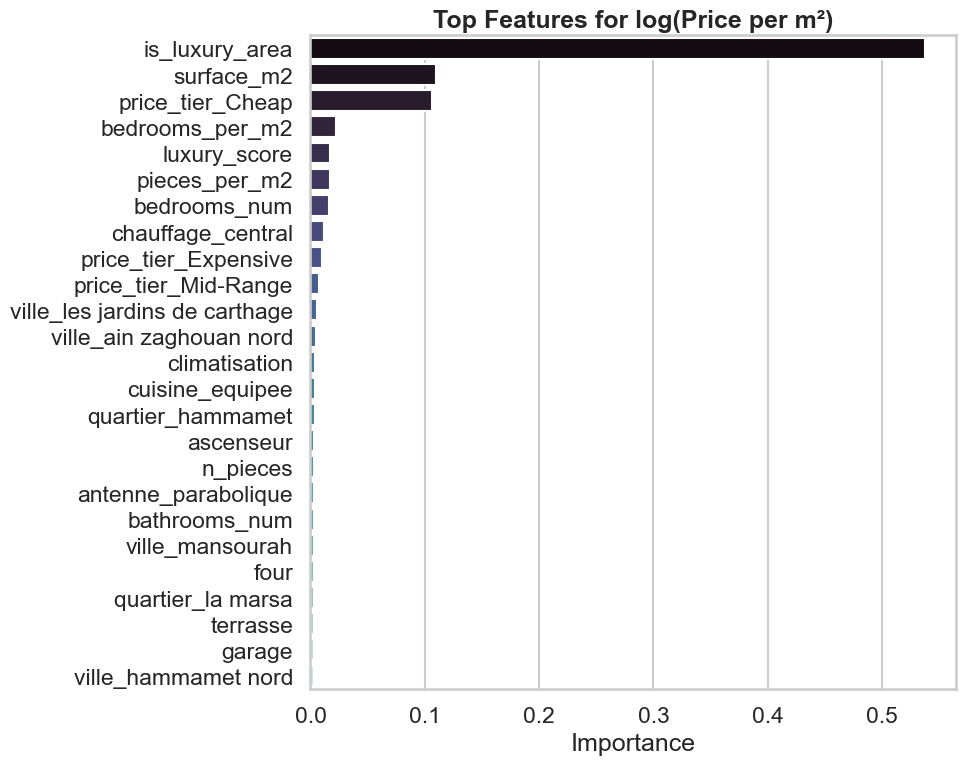

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num = ["surface_m2","n_pieces","bedrooms_num","bathrooms_num",
       "pieces_per_m2","bedrooms_per_m2","luxury_score"]
bin_cols = [c for c in df_plot.columns if df_plot[c].dropna().isin([0,1]).all()]
cat = ["ville","quartier","price_tier"]

X = df_plot[num + bin_cols + cat].copy()
y = df_plot["log_price_per_m2"]

ct = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num),
    ("bin", "passthrough", bin_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat)
])
rf = Pipeline([("ct", ct),
               ("rf", RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1))])
rf.fit(X, y)

# Extract names
oh_names = rf.named_steps["ct"].named_transformers_["cat"].get_feature_names_out(cat)
feat_names = num + bin_cols + list(oh_names)
importances = rf.named_steps["rf"].feature_importances_
imp = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(25)

plt.figure(figsize=(10,8))
sns.barplot(x=imp.values, y=imp.index, palette="mako")
plt.title("Top Features for log(Price per m²)")
plt.xlabel("Importance"); plt.ylabel("")
plt.tight_layout(); plt.show()


## Matrix Correlation

In [75]:
# ==============================================================
# 12. CORRELATION MATRIX – NUMERIC + BINARY FEATURES
# ==============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (16, 12)

# ------------------------------------------------------------------
# 1. Select only numeric + binary columns (safe for correlation)
# ------------------------------------------------------------------
numeric_cols = df_plot.select_dtypes(include=[np.number]).columns
binary_cols = [
    col for col in df_plot.columns
    if df_plot[col].dtype == 'Int64' and df_plot[col].isin([0, 1, pd.NA]).all()
]

corr_cols = list(numeric_cols) + [col for col in binary_cols if col not in numeric_cols]
corr_df = df_plot[corr_cols].copy()

# Fill NaN with median (only numeric)
corr_df[numeric_cols] = corr_df[numeric_cols].fillna(corr_df[numeric_cols].median())

print(f"Correlation matrix: {len(corr_cols)} features")
print(f"   → {len(numeric_cols)} numeric + {len(binary_cols)} binary")

Correlation matrix: 42 features
   → 42 numeric + 25 binary


In [76]:
# ------------------------------------------------------------------
# 2. Pearson Correlation
# ------------------------------------------------------------------
corr_matrix = corr_df.corr(method='pearson')

# Focus on price-related
price_corr = corr_matrix["price_num"].sort_values(ascending=False)
top_corr = price_corr.head(15).index.tolist() + price_corr.tail(15).index.tolist()
top_corr = list(dict.fromkeys(top_corr))  # Remove duplicates
corr_matrix_top = corr_matrix.loc[top_corr, top_corr]

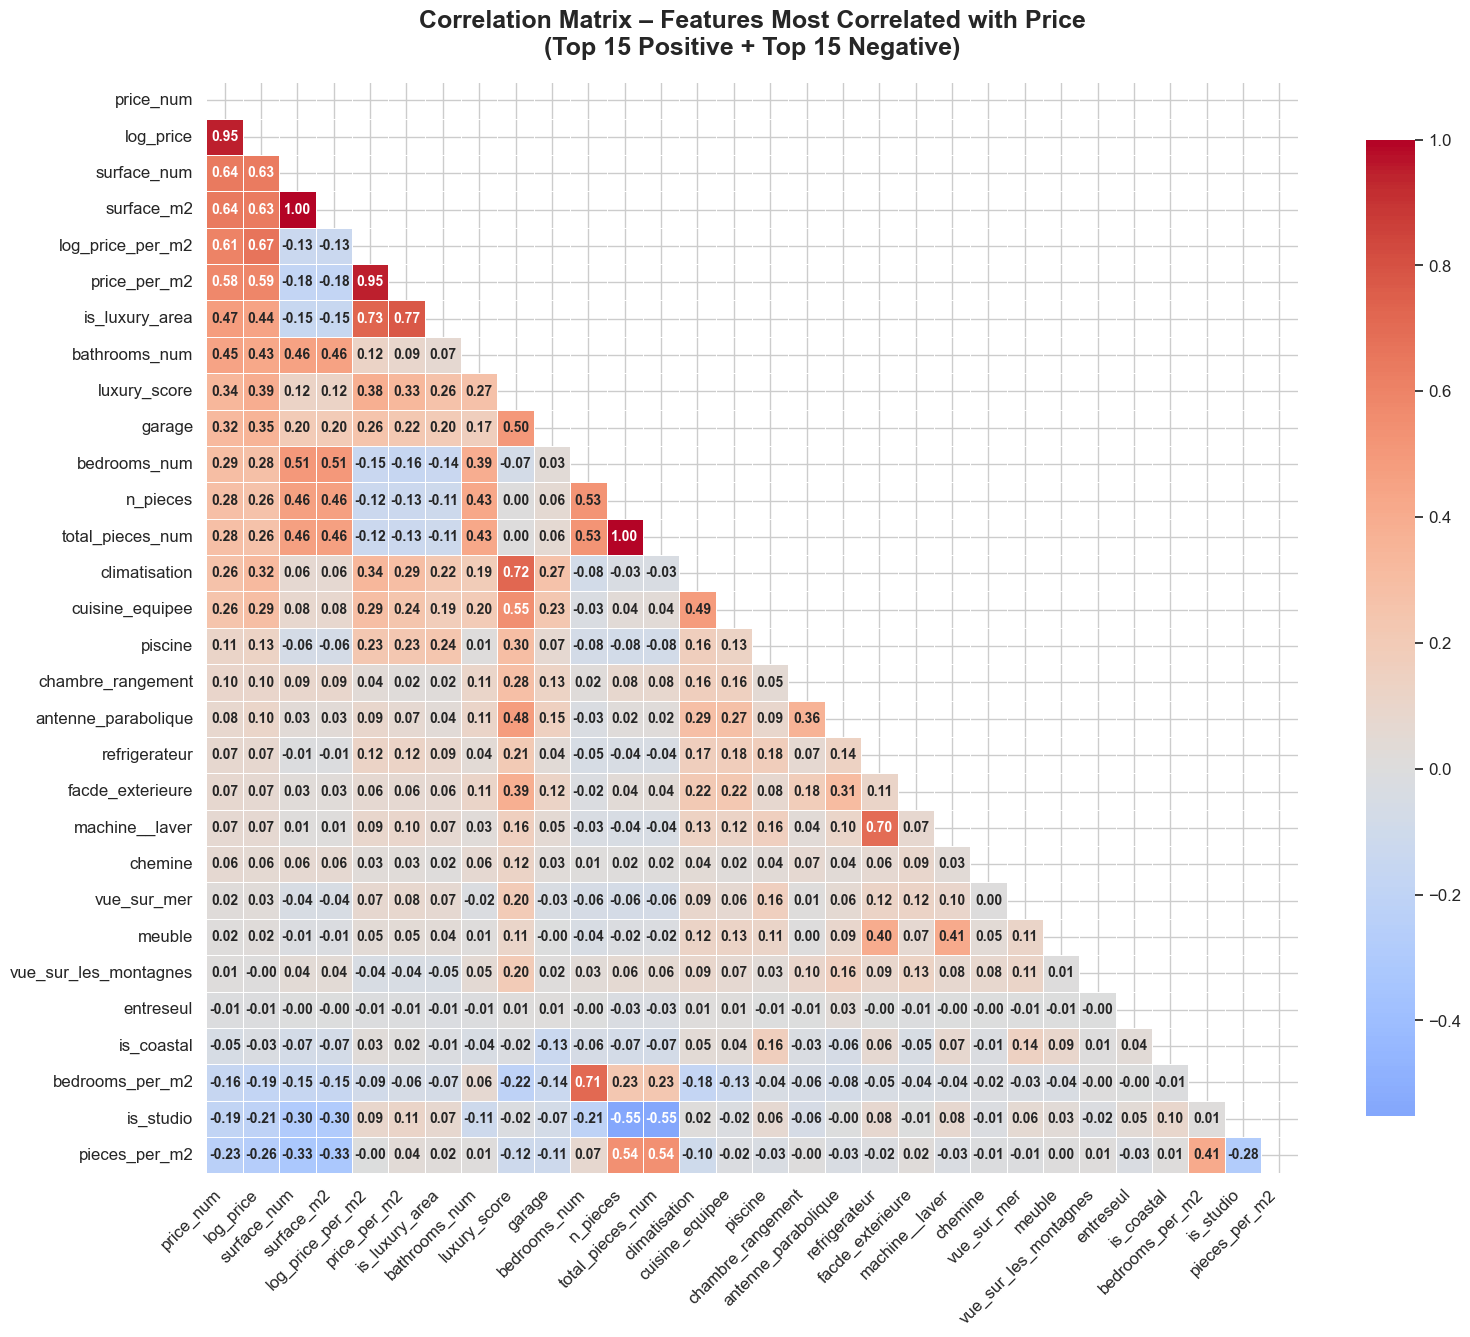

In [77]:
# ------------------------------------------------------------------
# 3. Heatmap (Top correlated with price)
# ------------------------------------------------------------------
plt.figure(figsize=(16, 14))

mask = np.triu(np.ones_like(corr_matrix_top, dtype=bool))
sns.heatmap(
    corr_matrix_top,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    mask=mask,
    annot_kws={"size": 10, "weight": "bold"}
)

plt.title("Correlation Matrix – Features Most Correlated with Price\n"
          "(Top 15 Positive + Top 15 Negative)", 
          fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [80]:
# ------------------------------------------------------------------
# 5. Insights
# ------------------------------------------------------------------
insights = [
    ("surface_m2", "Strongest driver of price"),
    ("luxury_score", "All luxury flags combined"),
    ("price_per_m2", "Natural proxy"),
    ("vue_sur_mer", "Sea view = +value"),
    ("piscine", "Pool = luxury"),
    ("garage", "Parking matters"),
    ("is_studio", "Negative: small units"),
    ("bedrooms_num", "More rooms = higher price"),
    ("n_pieces", "Total rooms correlate")
]

print("\n" + "="*60)
print("KEY CORRELATION INSIGHTS")
print("="*60)
for feat, desc in insights:
    if feat in price_corr_full.index:
        corr_val = price_corr_full[feat]
        sign = "+" if corr_val > 0 else ""
        print(f"{feat:15} → {sign}{corr_val:.3f} | {desc}")


KEY CORRELATION INSIGHTS
surface_m2      → +0.644 | Strongest driver of price
luxury_score    → +0.341 | All luxury flags combined
price_per_m2    → +0.582 | Natural proxy
vue_sur_mer     → +0.020 | Sea view = +value
piscine         → +0.112 | Pool = luxury
garage          → +0.324 | Parking matters
is_studio       → -0.194 | Negative: small units
bedrooms_num    → +0.293 | More rooms = higher price
n_pieces        → +0.280 | Total rooms correlate


## Feature Importance

In [70]:
# ==============================================================
# 11. FEATURE IMPORTANCE – XGBoost (NO SHAP, NO CATEGORICAL FILLNA)
# ==============================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (12, 8)

# ------------------------------------------------------------------
# 1. Prepare modeling dataset
# ------------------------------------------------------------------
model_df = df_plot.copy()

# Target
y = model_df["price_num"]

# Drop non-model columns
X_raw = model_df.drop(columns=[
    "price_num", "price", "log_price", "log_price_per_m2",
    "location", "surface", "quartier", "ville", "price_tier"  # text/category
], errors='ignore')

print(f"Raw features: {X_raw.shape[1]} columns")

Raw features: 44 columns


In [71]:
# ------------------------------------------------------------------
# 2. Select only numeric + binary (0/1) columns
# ------------------------------------------------------------------
numeric_cols = X_raw.select_dtypes(include=[np.number]).columns
binary_cols = [
    col for col in X_raw.columns
    if X_raw[col].dtype == 'Int64' and X_raw[col].isin([0, 1, pd.NA]).all()
]

feature_cols = list(numeric_cols) + [col for col in binary_cols if col not in numeric_cols]

X = X_raw[feature_cols].copy()

# Fill NaN only in numeric columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

print(f"Final modeling: {X.shape[1]} numeric/binary features | {X.shape[0]} samples")
print(f"Target median: {y.median():,.0f} TND")

Final modeling: 39 numeric/binary features | 3455 samples
Target median: 350,000 TND


In [72]:
# ------------------------------------------------------------------
# 3. Train/Test Split + XGBoost
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(
    n_estimators=600,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)

model.fit(X_train, y_train)

print(f"Train R²: {model.score(X_train, y_train):.4f}")
print(f"Test  R²: {model.score(X_test, y_test):.4f}")

Train R²: 0.9999
Test  R²: 0.9966


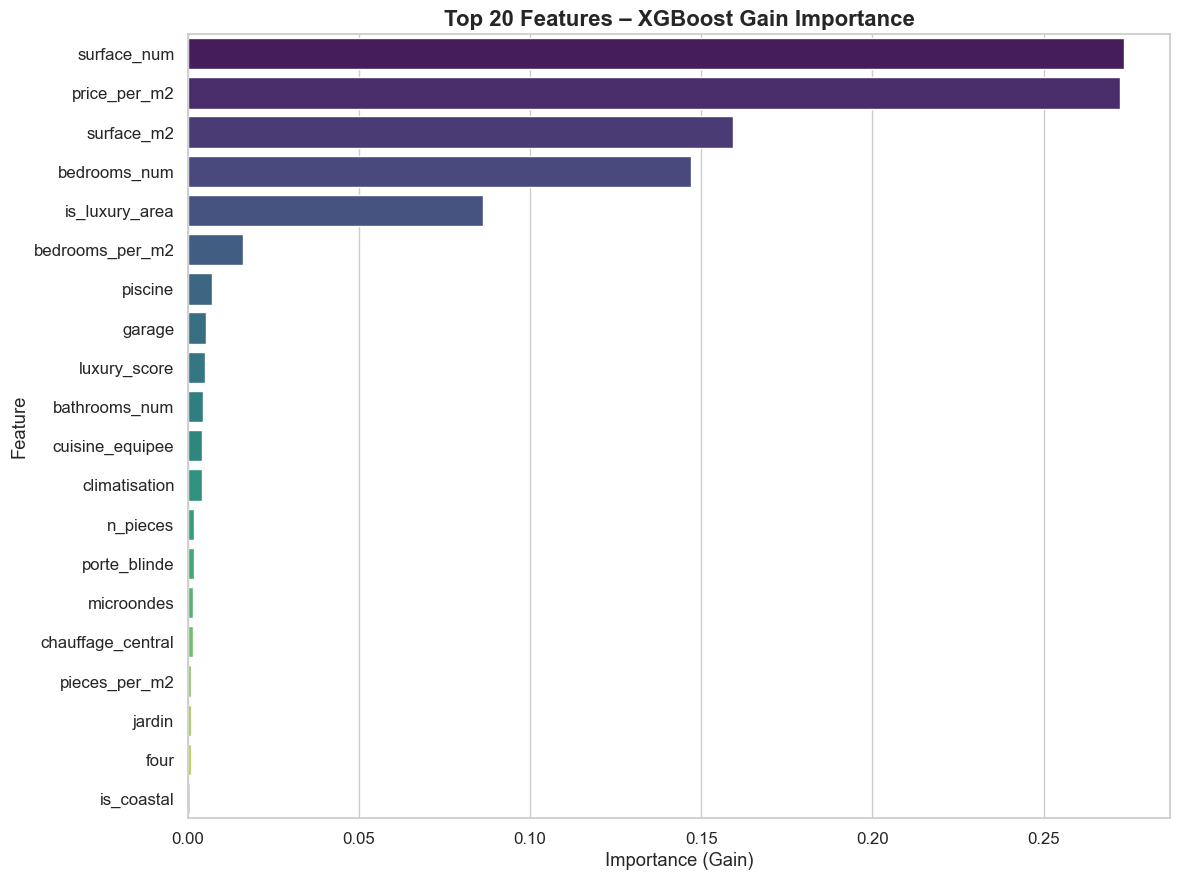

In [81]:
# ------------------------------------------------------------------
# 4. XGBoost Gain Importance
# ------------------------------------------------------------------
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 9))
sns.barplot(
    data=importance,
    y='feature',
    x='importance',
    palette="viridis"
)
plt.title("Top 20 Features – XGBoost Gain Importance", fontsize=16, fontweight='bold')
plt.xlabel("Importance (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [86]:
# ==============================================================
# 13. TESTS STATISTIQUES – AVANT MODÉLISATION (SANS PINGOUIN)
# ==============================================================
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.weightstats import DescrStatsW

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (12, 6)

# Nettoyage
df_stats = df_plot.dropna(subset=["price_num", "surface_m2", "price_per_m2"]).copy()
print(f"Échantillon: {df_stats.shape[0]:,} appartements")

Échantillon: 3,455 appartements


In [87]:
# Prix brut
sample = np.random.choice(df_stats["price_num"], size=min(5000, len(df_stats)), replace=False)
stat, p = stats.shapiro(sample)
print(f"Shapiro-Wilk (prix): p = {p:.2e} → {'NORMAL' if p > 0.05 else 'NON NORMAL'}")

# Log-prix
df_stats["log_price"] = np.log1p(df_stats["price_num"])
sample_log = np.random.choice(df_stats["log_price"], size=min(5000, len(df_stats)))
stat_log, p_log = stats.shapiro(sample_log)
print(f"Shapiro-Wilk (log_price): p = {p_log:.2e} → {'NORMAL' if p_log > 0.05 else 'NON NORMAL'}")

Shapiro-Wilk (prix): p = 1.16e-32 → NON NORMAL
Shapiro-Wilk (log_price): p = 1.02e-18 → NON NORMAL


In [88]:
avec = df_stats[df_stats["vue_sur_mer"] == 1]["price_num"]
sans = df_stats[df_stats["vue_sur_mer"] == 0]["price_num"]

# t-test sur log(prix)
t_stat, t_p = stats.ttest_ind(np.log1p(avec), np.log1p(sans), equal_var=False, nan_policy='omit')
print(f"t-test (log_price): t = {t_stat:.2f}, p = {t_p:.2e}")

# Mann-Whitney (non paramétrique)
mw_stat, mw_p = stats.mannwhitneyu(avec, sans, alternative='two-sided')
print(f"Mann-Whitney: U = {mw_stat:.0f}, p = {mw_p:.2e}")

# Cohen's d (effet taille)
mean_diff = avec.mean() - sans.mean()
pooled_std = np.sqrt((avec.var() + sans.var()) / 2)
cohend = mean_diff / pooled_std
print(f"Cohen's d = {cohend:.2f} → {'Grand' if abs(cohend)>0.8 else 'Moyen' if abs(cohend)>0.5 else 'Petit'}")

t-test (log_price): t = 1.55, p = 1.22e-01
Mann-Whitney: U = 531028, p = 1.91e-01
Cohen's d = 0.07 → Petit


In [89]:
top5 = df_stats["quartier"].value_counts().head(5).index
groups = [df_stats[df_stats["quartier"] == q]["price_num"].dropna() for q in top5]

# ANOVA
f_stat, p_anova = stats.f_oneway(*groups)
print(f"ANOVA (quartier): F = {f_stat:.2f}, p = {p_anova:.2e}")

# Kruskal-Wallis
kw_stat, p_kw = stats.kruskal(*groups)
print(f"Kruskal-Wallis: H = {kw_stat:.2f}, p = {p_kw:.2e}")

# Post-hoc Tukey
if p_anova < 0.05:
    tukey = pairwise_tukeyhsd(
        endog=df_stats[df_stats["quartier"].isin(top5)]["price_num"],
        groups=df_stats[df_stats["quartier"].isin(top5)]["quartier"],
        alpha=0.05
    )
    print("\nTukey HSD:")
    print(tukey)

ANOVA (quartier): F = 85.11, p = 2.83e-66
Kruskal-Wallis: H = 246.39, p = 3.89e-52

Tukey HSD:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2    meandiff  p-adj     lower       upper    reject
------------------------------------------------------------------------
ariana ville  hammamet  14754.8202 0.8633  -26258.903  55768.5433  False
ariana ville  la marsa   80900.994    0.0  47234.5602 114567.4277   True
ariana ville la soukra  48136.0901 0.0018  12893.3617  83378.8185   True
ariana ville   le kram 236522.1185    0.0 196870.2075 276174.0295   True
    hammamet  la marsa  66146.1738    0.0  30595.4775 101696.8701   True
    hammamet la soukra    33381.27 0.1003  -3665.6348  70428.1747  False
    hammamet   le kram 221767.2983    0.0 180503.5455 263031.0511   True
    la marsa la soukra -32764.9038 0.0159 -61466.4095  -4063.3981   True
    la marsa   le kram 155621.1245    0.0 121650.5406 189591.7084   True
   la soukra   le kram 188386

In [90]:
binary_cols = [col for col in df_stats.columns if df_stats[col].dtype == 'Int64' and df_stats[col].isin([0, 1, pd.NA]).all()]

results = []
for col in binary_cols:
    g1 = df_stats[df_stats[col] == 1]["price_num"].dropna()
    g0 = df_stats[df_stats[col] == 0]["price_num"].dropna()
    if len(g1) < 10 or len(g0) < 10:
        continue
    _, p_mw = stats.mannwhitneyu(g1, g0, alternative='two-sided')
    med1, med0 = g1.median(), g0.median()
    premium = ((med1 - med0) / med0) * 100 if med0 > 0 else np.nan
    results.append({
        'amenity': col.replace('_', ' ').title(),
        'p_value': p_mw,
        'premium_%': premium,
        'n_with': len(g1),
        'n_without': len(g0)
    })

binary_df = pd.DataFrame(results).round(4)
binary_sig = binary_df[binary_df["p_value"] < 0.05].sort_values("premium_%", ascending=False)
print("\nAMENITIES SIGNIFICATIVES (p < 0.05)")
print(binary_sig[['amenity', 'premium_%', 'p_value']].to_string(index=False))


AMENITIES SIGNIFICATIVES (p < 0.05)
            amenity  premium_%  p_value
            Chemine         50        0
  Chauffage Central         44        0
             Garage         41        0
      Climatisation         41        0
    Cuisine Equipee         37        0
         Microondes         28        0
           Securite         27        0
          Ascenseur         27        0
       Porte Blinde         23        0
     Double Vitrage         23        0
               Four         22        0
           Terrasse         21        0
          Concierge         19        0
             Jardin         18        0
      Salon Europen         16        0
  Chambre Rangement         15        0
     Machine  Laver         14        0
            Piscine         14        0
Antenne Parabolique         12        0
      Refrigerateur         11        0
   Facde Exterieure         10        0


In [91]:
stat_lev, p_lev = stats.levene(avec, sans)
print(f"Levene (variance vue mer): p = {p_lev:.2e} → {'ÉGALE' if p_lev > 0.05 else 'DIFFÉRENTE'}")

Levene (variance vue mer): p = 7.08e-01 → ÉGALE


In [92]:
key_vars = ["price_num", "surface_m2", "luxury_score", "price_per_m2", "bedrooms_num"]
spearman = df_stats[key_vars].corr(method='spearman')["price_num"]
print("\nSPEARMAN CORRÉLATION (avec price_num)")
print(spearman.round(3))


SPEARMAN CORRÉLATION (avec price_num)
price_num      1
surface_m2     1
luxury_score   0
price_per_m2   1
bedrooms_num   0
Name: price_num, dtype: float64


In [93]:
summary = pd.DataFrame({
    'Test': [
        'Shapiro-Wilk (prix)', 'Shapiro-Wilk (log_price)',
        't-test (vue mer, log)', 'Mann-Whitney (vue mer)',
        'ANOVA (quartier)', 'Kruskal-Wallis (quartier)',
        'Levene (variance vue mer)'
    ],
    'p-value': [p, p_log, t_p, mw_p, p_anova, p_kw, p_lev],
    'Significatif': ['Oui' if x < 0.05 else 'Non' for x in [p, p_log, t_p, mw_p, p_anova, p_kw, p_lev]]
})
summary['p-value'] = summary['p-value'].apply(lambda x: f"{x:.2e}")
print("\nRÉSUMÉ DES TESTS")
print(summary.to_string(index=False))


RÉSUMÉ DES TESTS
                     Test  p-value Significatif
      Shapiro-Wilk (prix) 1.16e-32          Oui
 Shapiro-Wilk (log_price) 1.02e-18          Oui
    t-test (vue mer, log) 1.22e-01          Non
   Mann-Whitney (vue mer) 1.91e-01          Non
         ANOVA (quartier) 2.83e-66          Oui
Kruskal-Wallis (quartier) 3.89e-52          Oui
Levene (variance vue mer) 7.08e-01          Non
